# Stroke Prediction|Multiple Models|Classification



# Stroke Prediction

In [ ]:
# !pip uninstall scikit-learn --yes
# !pip uninstall imbalanced-learn --yes
# !pip install scikit-learn==1.2.2
# !pip install imbalanced-learn

## Importing Libraries

In [ ]:
#Importing all the neccessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report,ConfusionMatrixDisplay, roc_curve, roc_auc_score, accuracy_score,
    f1_score, precision_score, recall_score
    )

## Importing Data

In [ ]:
#Loading the required data
df = pd.read_csv('diabetes_data.csv')
pd.set_option('display.max_columns',30)
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

## Data Analysis

### Verificando valores nulos

In [ ]:
#Assessing for missing values
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

### Verificando valores únicos das variáveis

In [ ]:
#Evaluating number of unique values in each column
unique_vals=[]

for col in df.columns:
    unival=df[col].nunique()
    unique_vals.append(unival)

#Presenting the findings using a dataframe
pd.DataFrame(unique_vals,columns=['Unique_Values'],index=df.columns)

,Unique_Values
Age,13
Sex,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


É evidente dos dados acima que a maioria dos atributos são de natureza categórica, e apenas alguns deles possuem valores contínuos.

### Separando as colunas numéricas das categóricas

In [ ]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [ ]:
# cols=['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker',
#        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
#        'HvyAlcoholConsump', 'GenHlth', 'DiffWalk',
#        'Diabetes', 'HighBP', 'Stroke']

# Identificando variáveis categóricas e numéricas com base nos valores únicos
categorical_cols = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack',
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
                   'GenHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']
numerical_cols = ['Age', 'BMI', 'MentHlth', 'PhysHlth']

### Análise do desbalanceamento da variável alvo (Stroke)

Contagem da variável alvo (Stroke):
Stroke
0.0    66297
1.0     4395
Name: count, dtype: int64

Proporção de cada classe (%):
Stroke
0.0    93.782889
1.0     6.217111
Name: proportion, dtype: float64

Razão de desbalanceamento: 15.08


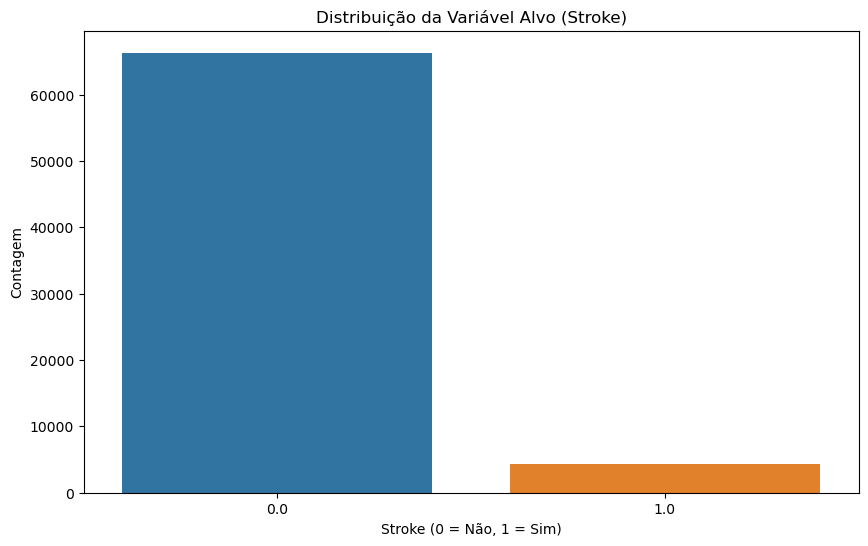

Gráfico da distribuição salvo como 'stroke_distribution.png'


In [ ]:
# Contagem de valores da variável alvo
target_counts = df['Stroke'].value_counts()
print("Contagem da variável alvo (Stroke):")
print(target_counts)

# Proporção de cada classe
target_props = df['Stroke'].value_counts(normalize=True) * 100
print("\nProporção de cada classe (%):")
print(target_props)

# Razão de desbalanceamento
imbalance_ratio = target_counts.max() / target_counts.min()
print(f"\nRazão de desbalanceamento: {imbalance_ratio:.2f}")

# Visualização do desbalanceamento
plt.figure(figsize=(10, 6))
sns.countplot(x='Stroke', data=df)
plt.title('Distribuição da Variável Alvo (Stroke)')
plt.xlabel('Stroke (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
# plt.savefig('C:/Users/gabri/Downloads/Diabetes/stroke_distribution.png')
# print("Gráfico da distribuição salvo como 'stroke_distribution.png'")
plt.show()
plt.close()



### Análise Estatística das variáveis numéricas

In [ ]:
# Estatísticas descritivas para variáveis numéricas
numeric_stats = df[numerical_cols].describe().T

# Adicionando mais métricas estatísticas
numeric_stats['mode'] = df[numerical_cols].mode().iloc[0]
numeric_stats['skewness'] = df[numerical_cols].skew()
numeric_stats['kurtosis'] = df[numerical_cols].kurtosis()
numeric_stats['iqr'] = numeric_stats['75%'] - numeric_stats['25%']
numeric_stats['cv'] = numeric_stats['std'] / numeric_stats['mean'] * 100  # Coeficiente de variação

print(numeric_stats)

            count       mean        std   min   25%   50%   75%   max  mode  \
Age       70692.0   8.584055   2.852153   1.0   7.0   9.0  11.0  13.0  10.0   
BMI       70692.0  29.856985   7.113954  12.0  25.0  29.0  33.0  98.0  27.0   
MentHlth  70692.0   3.752037   8.155627   0.0   0.0   0.0   2.0  30.0   0.0   
PhysHlth  70692.0   5.810417  10.062261   0.0   0.0   0.0   6.0  30.0   0.0   

          skewness  kurtosis  iqr          cv  
Age      -0.545923 -0.213232  4.0   33.226176  
BMI       1.719180  7.164081  8.0   23.826765  
MentHlth  2.388110  4.491547  2.0  217.365302  
PhysHlth  1.657304  1.179731  6.0  173.176219  


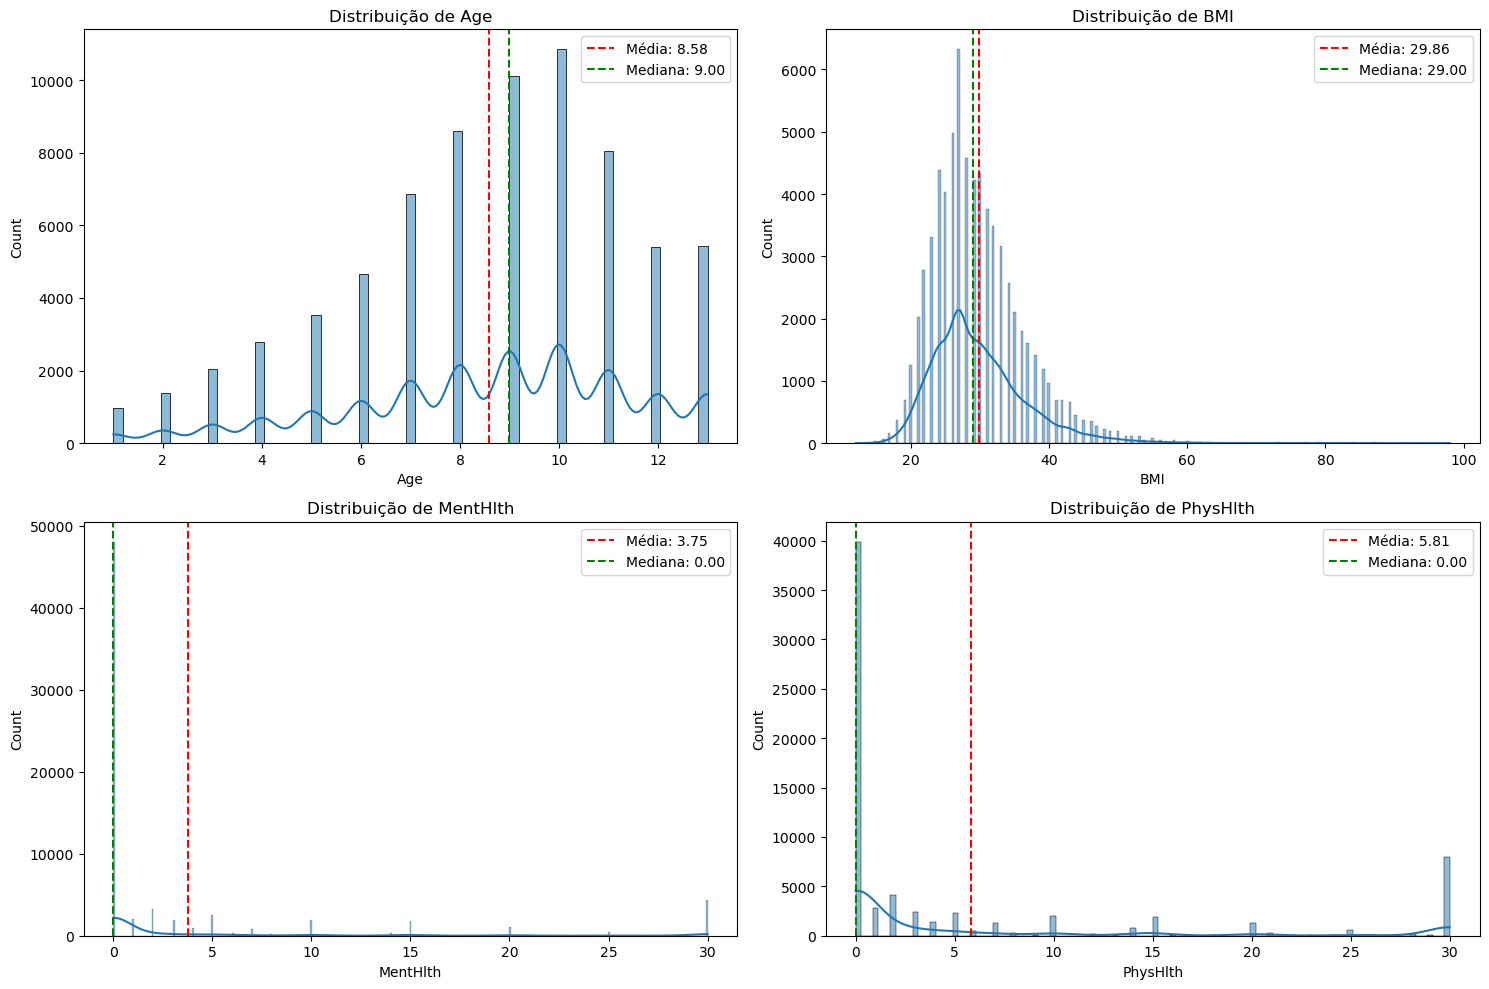

In [ ]:
# Visualizando a distribuição das variáveis numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.axvline(df[col].mean(), color='red', linestyle='--', label=f'Média: {df[col].mean():.2f}')
    plt.axvline(df[col].median(), color='green', linestyle='--', label=f'Mediana: {df[col].median():.2f}')
    plt.legend()
plt.tight_layout()
# plt.savefig('numeric_distributions.png')
# print("Gráficos das distribuições numéricas salvos como 'numeric_distributions.png'")
plt.show()
plt.close()



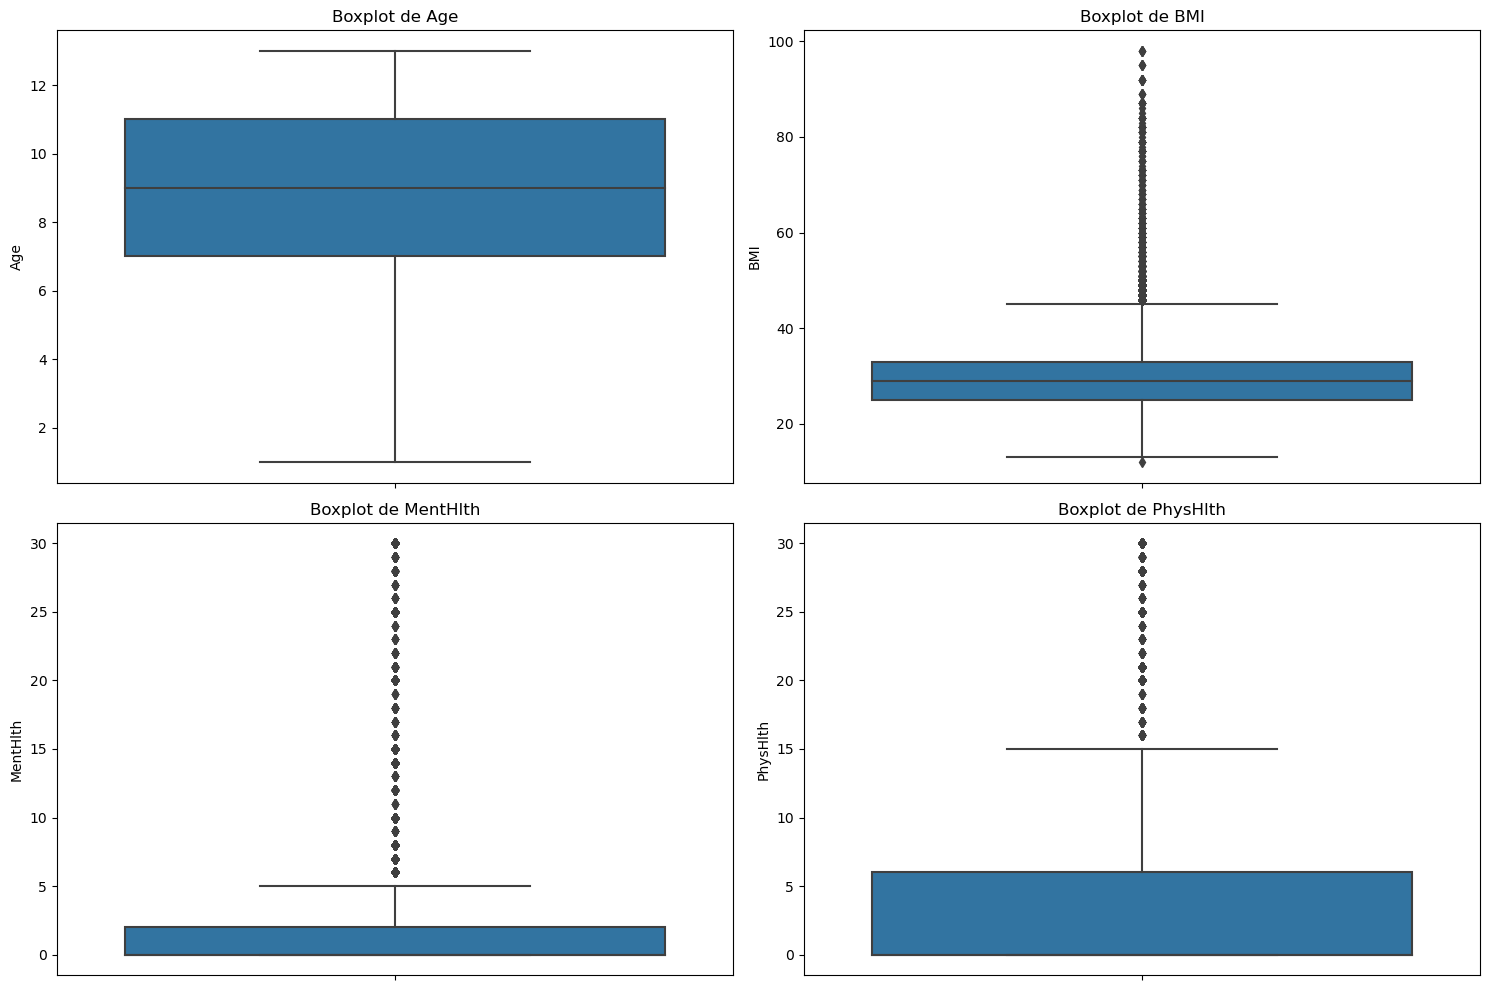

In [ ]:
# Boxplots para identificar outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
# plt.savefig('C:/Users/gabri/Downloads/Diabetes/numeric_boxplots.png')
# print("Boxplots das variáveis numéricas salvos como 'numeric_boxplots.png'")
plt.show()
plt.close()



### Análise Estatística das variáveis categóricas


Análise da variável: Sex
----------------------------------------
Valores únicos: 2
Moda (valor mais frequente): 0.0

Contagem de cada categoria:
Sex
0.0    38386
1.0    32306
Name: count, dtype: int64

Proporção de cada categoria (%):
Sex
0.0    54.300345
1.0    45.699655
Name: proportion, dtype: float64

Razão de desbalanceamento: 1.19


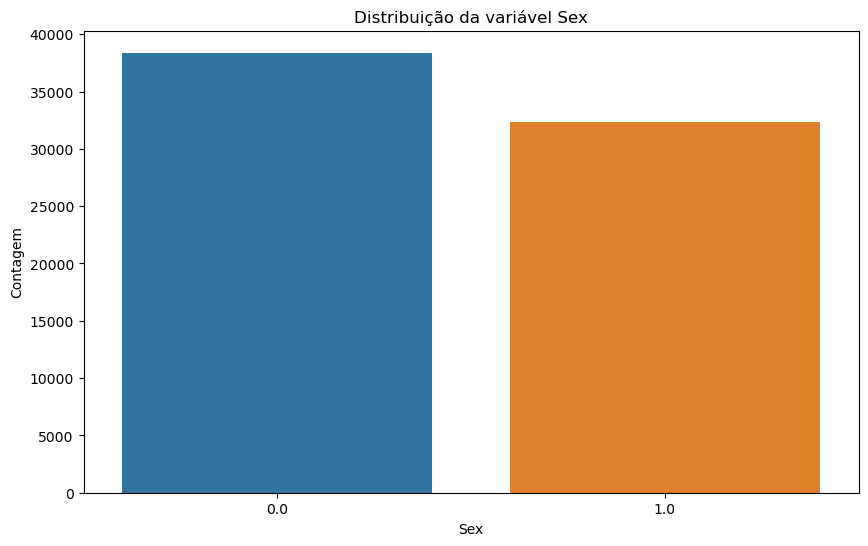


Análise da variável: HighChol
----------------------------------------
Valores únicos: 2
Moda (valor mais frequente): 1.0

Contagem de cada categoria:
HighChol
0.0    33529
1.0    37163
Name: count, dtype: int64

Proporção de cada categoria (%):
HighChol
0.0    47.429695
1.0    52.570305
Name: proportion, dtype: float64

Razão de desbalanceamento: 1.11


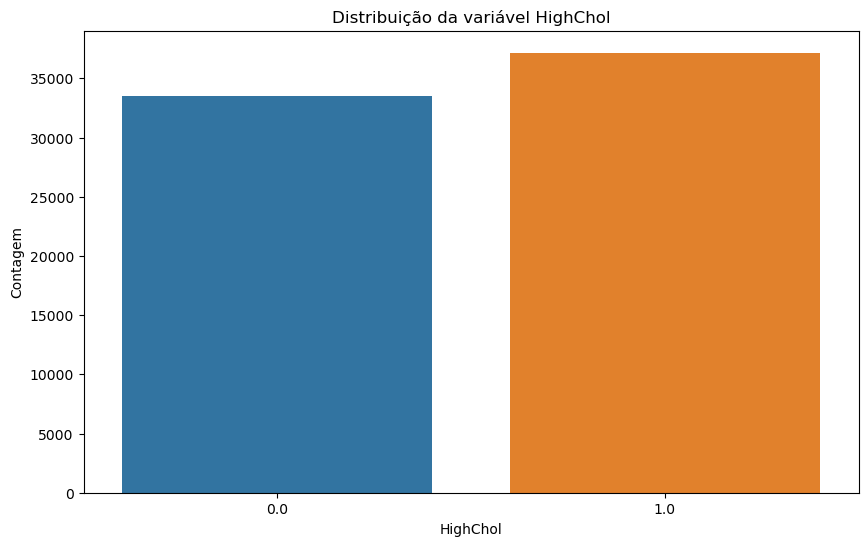


Análise da variável: CholCheck
----------------------------------------
Valores únicos: 2
Moda (valor mais frequente): 1.0

Contagem de cada categoria:
CholCheck
0.0     1749
1.0    68943
Name: count, dtype: int64

Proporção de cada categoria (%):
CholCheck
0.0     2.474113
1.0    97.525887
Name: proportion, dtype: float64

Razão de desbalanceamento: 39.42


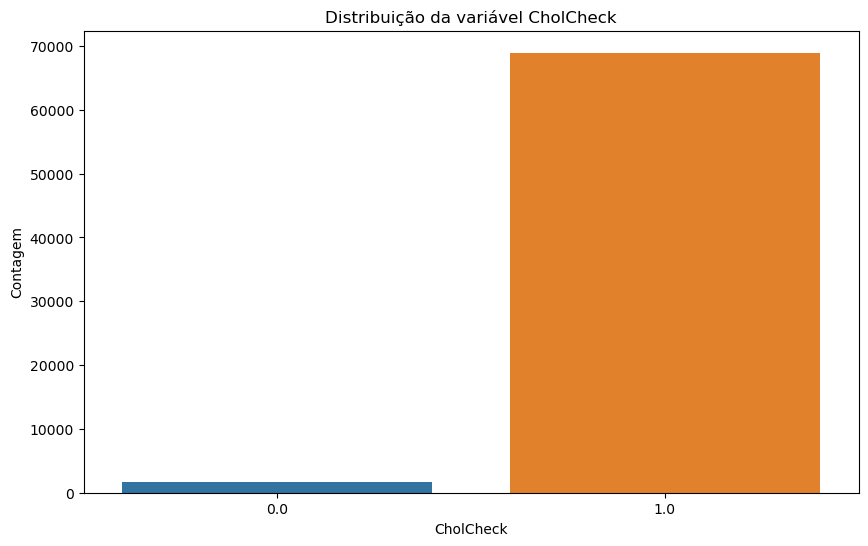


Análise da variável: Smoker
----------------------------------------
Valores únicos: 2
Moda (valor mais frequente): 0.0

Contagem de cada categoria:
Smoker
0.0    37094
1.0    33598
Name: count, dtype: int64

Proporção de cada categoria (%):
Smoker
0.0    52.472698
1.0    47.527302
Name: proportion, dtype: float64

Razão de desbalanceamento: 1.10


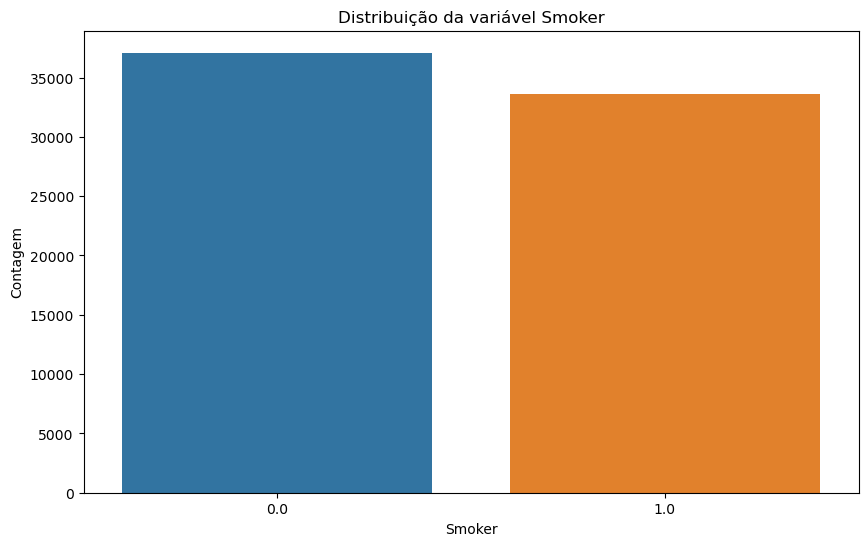


Análise da variável: HeartDiseaseorAttack
----------------------------------------
Valores únicos: 2
Moda (valor mais frequente): 0.0

Contagem de cada categoria:
HeartDiseaseorAttack
0.0    60243
1.0    10449
Name: count, dtype: int64

Proporção de cada categoria (%):
HeartDiseaseorAttack
0.0    85.218978
1.0    14.781022
Name: proportion, dtype: float64

Razão de desbalanceamento: 5.77


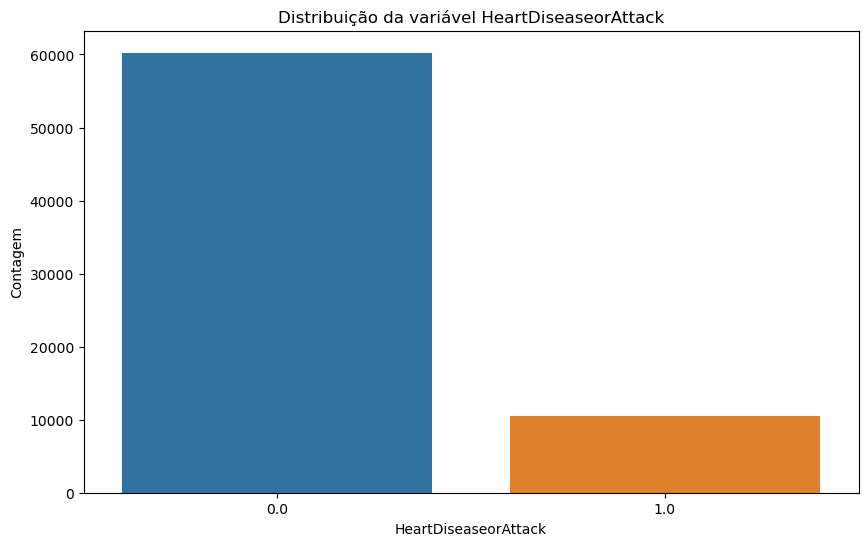


Análise da variável: PhysActivity
----------------------------------------
Valores únicos: 2
Moda (valor mais frequente): 1.0

Contagem de cada categoria:
PhysActivity
0.0    20993
1.0    49699
Name: count, dtype: int64

Proporção de cada categoria (%):
PhysActivity
0.0    29.69643
1.0    70.30357
Name: proportion, dtype: float64

Razão de desbalanceamento: 2.37


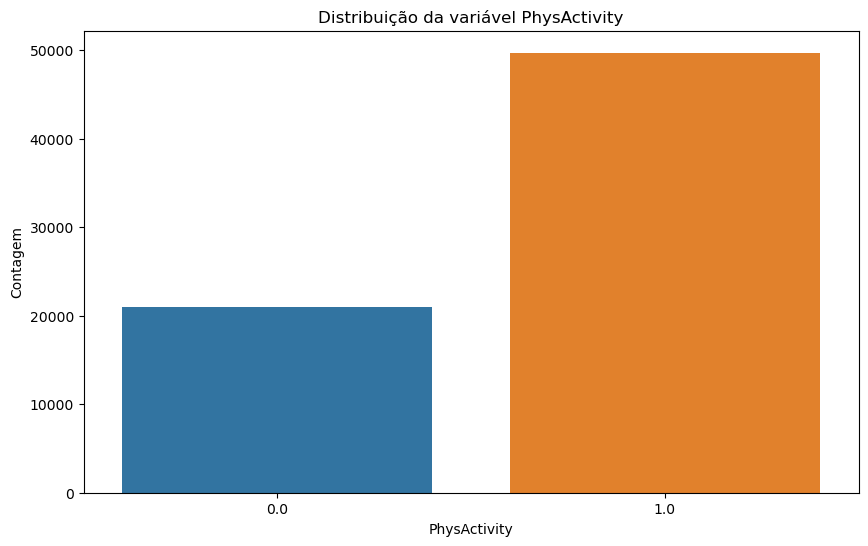


Análise da variável: Fruits
----------------------------------------
Valores únicos: 2
Moda (valor mais frequente): 1.0

Contagem de cada categoria:
Fruits
0.0    27443
1.0    43249
Name: count, dtype: int64

Proporção de cada categoria (%):
Fruits
0.0    38.820517
1.0    61.179483
Name: proportion, dtype: float64

Razão de desbalanceamento: 1.58


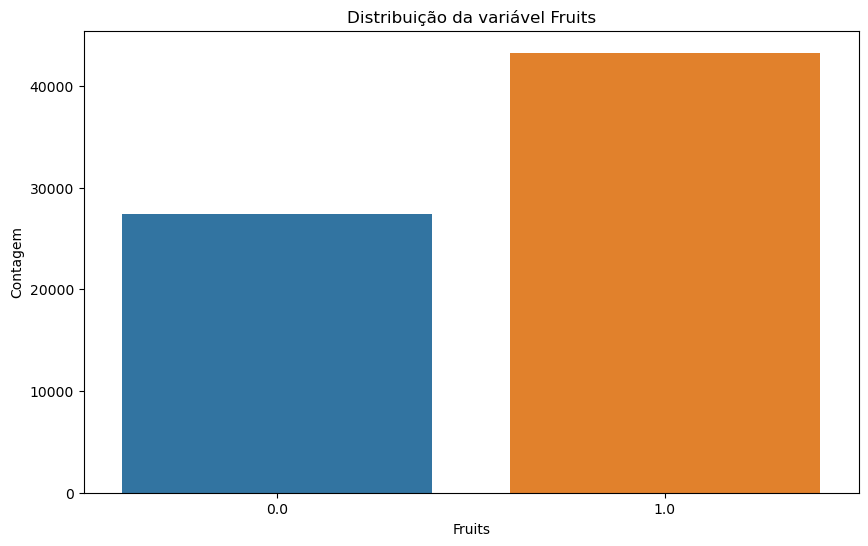


Análise da variável: Veggies
----------------------------------------
Valores únicos: 2
Moda (valor mais frequente): 1.0

Contagem de cada categoria:
Veggies
0.0    14932
1.0    55760
Name: count, dtype: int64

Proporção de cada categoria (%):
Veggies
0.0    21.122616
1.0    78.877384
Name: proportion, dtype: float64

Razão de desbalanceamento: 3.73


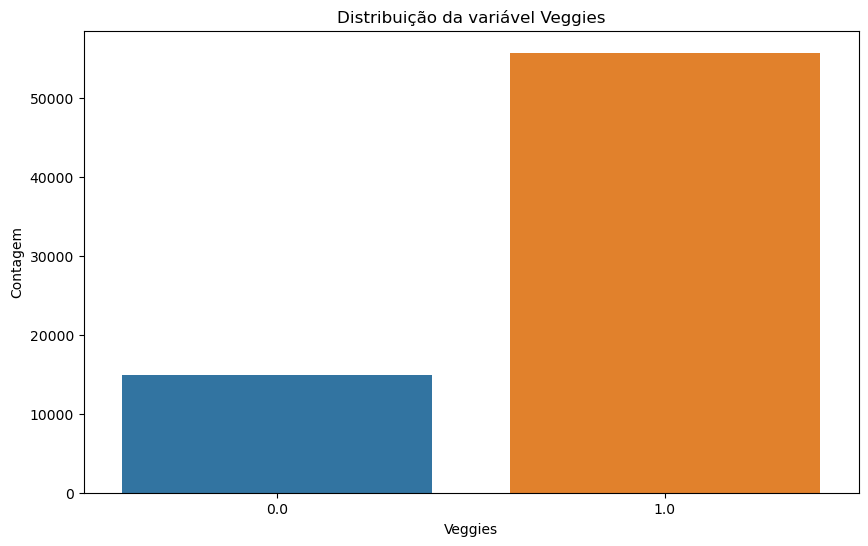


Análise da variável: HvyAlcoholConsump
----------------------------------------
Valores únicos: 2
Moda (valor mais frequente): 0.0

Contagem de cada categoria:
HvyAlcoholConsump
0.0    67672
1.0     3020
Name: count, dtype: int64

Proporção de cada categoria (%):
HvyAlcoholConsump
0.0    95.727947
1.0     4.272053
Name: proportion, dtype: float64

Razão de desbalanceamento: 22.41


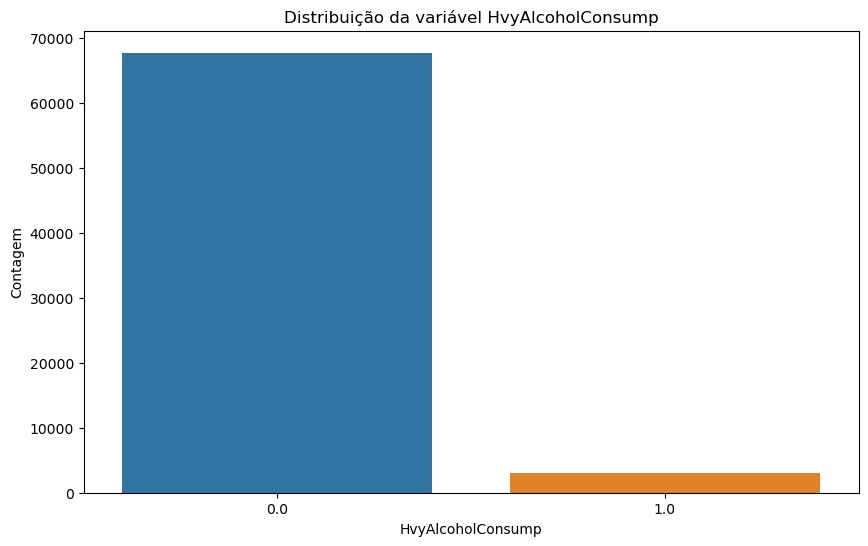


Análise da variável: GenHlth
----------------------------------------
Valores únicos: 5
Moda (valor mais frequente): 3.0

Contagem de cada categoria:
GenHlth
1.0     8282
2.0    19872
3.0    23427
4.0    13303
5.0     5808
Name: count, dtype: int64

Proporção de cada categoria (%):
GenHlth
1.0    11.715611
2.0    28.110677
3.0    33.139535
4.0    18.818254
5.0     8.215923
Name: proportion, dtype: float64

Razão de desbalanceamento: 4.03


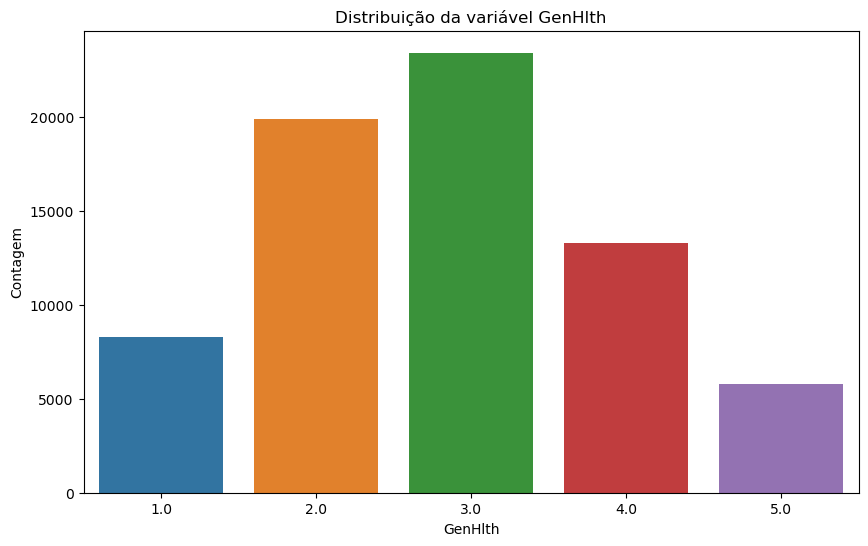


Análise da variável: DiffWalk
----------------------------------------
Valores únicos: 2
Moda (valor mais frequente): 0.0

Contagem de cada categoria:
DiffWalk
0.0    52826
1.0    17866
Name: count, dtype: int64

Proporção de cada categoria (%):
DiffWalk
0.0    74.726985
1.0    25.273015
Name: proportion, dtype: float64

Razão de desbalanceamento: 2.96


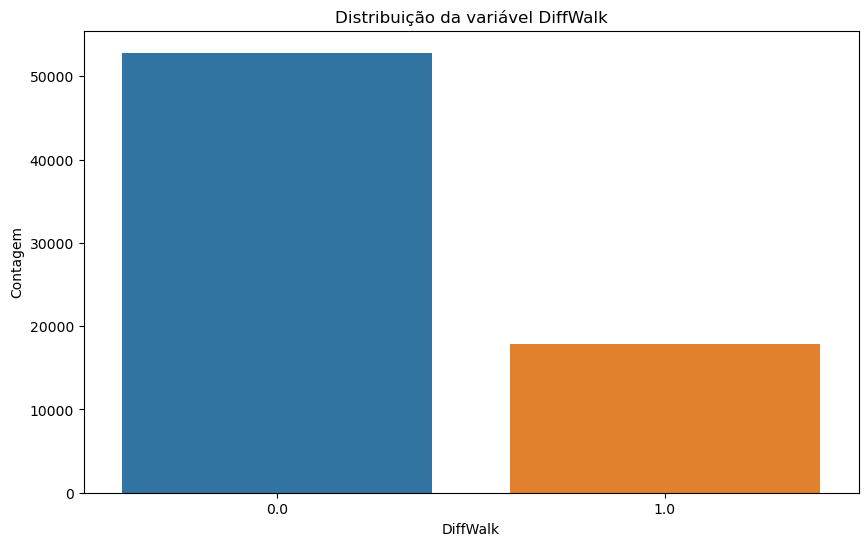


Análise da variável: Stroke
----------------------------------------
Valores únicos: 2
Moda (valor mais frequente): 0.0

Contagem de cada categoria:
Stroke
0.0    66297
1.0     4395
Name: count, dtype: int64

Proporção de cada categoria (%):
Stroke
0.0    93.782889
1.0     6.217111
Name: proportion, dtype: float64

Razão de desbalanceamento: 15.08


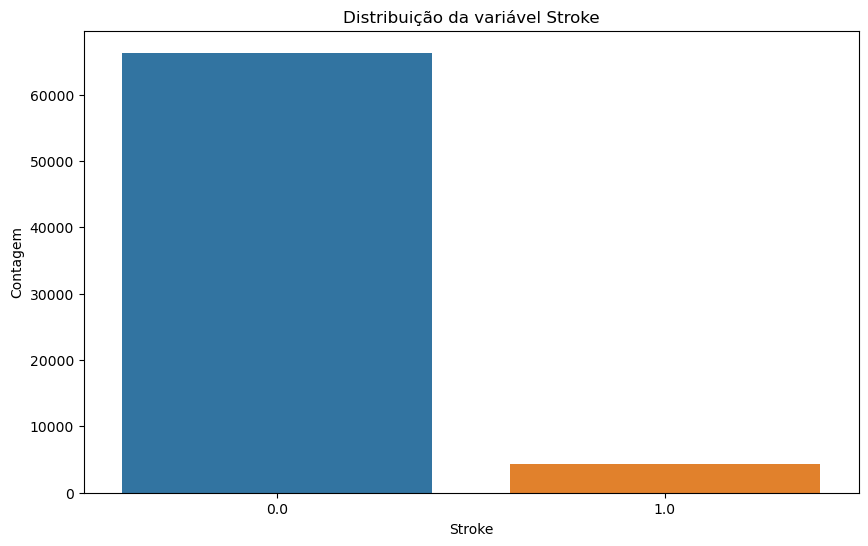


Análise da variável: HighBP
----------------------------------------
Valores únicos: 2
Moda (valor mais frequente): 1.0

Contagem de cada categoria:
HighBP
0.0    30860
1.0    39832
Name: count, dtype: int64

Proporção de cada categoria (%):
HighBP
0.0    43.654162
1.0    56.345838
Name: proportion, dtype: float64

Razão de desbalanceamento: 1.29


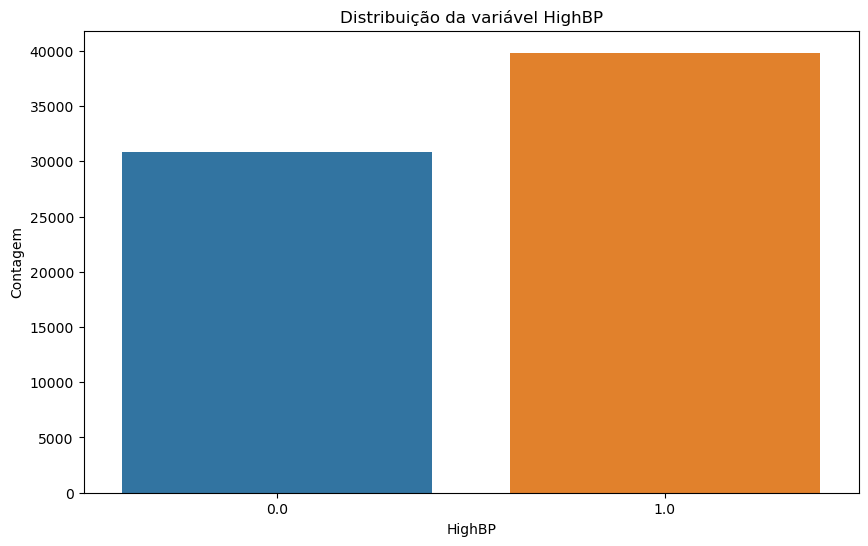


Análise da variável: Diabetes
----------------------------------------
Valores únicos: 2
Moda (valor mais frequente): 0.0

Contagem de cada categoria:
Diabetes
0.0    35346
1.0    35346
Name: count, dtype: int64

Proporção de cada categoria (%):
Diabetes
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64

Razão de desbalanceamento: 1.00


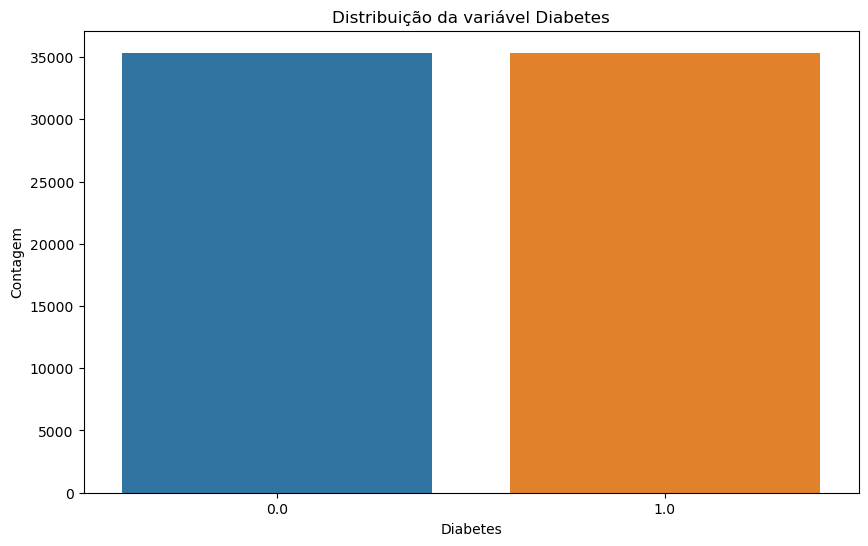

In [ ]:
# Função para analisar variáveis categóricas
def analyze_categorical(df, col_name):
    counts = df[col_name].value_counts().sort_index()
    proportions = df[col_name].value_counts(normalize=True).sort_index() * 100
    mode_value = df[col_name].mode()[0]
    
    print(f"\nAnálise da variável: {col_name}")
    print("-" * 40)
    print("Valores únicos:", df[col_name].nunique())
    print("Moda (valor mais frequente):", mode_value)
    print("\nContagem de cada categoria:")
    print(counts)
    print("\nProporção de cada categoria (%):")
    print(proportions)
    
    # Verificando desbalanceamento
    if len(counts) > 1:
        imbalance = counts.max() / counts.min()
        print(f"\nRazão de desbalanceamento: {imbalance:.2f}")
    
    # Visualização
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col_name, data=df)
    plt.title(f'Distribuição da variável {col_name}')
    plt.ylabel('Contagem')
    # plt.savefig(f'C:/Users/gabri/Downloads/Diabetes/{col_name}_distribution.png')
    # print(f"Gráfico salvo como '{col_name}_distribution.png'")
    plt.show()
    plt.close()
    
    
    
    return counts, proportions

# Analisando cada variável categórica
for col in categorical_cols:
    analyze_categorical(df, col)

In [ ]:
# #Presenting the countplots for categorical features
# for i in cols:
#   fig, ax = plt.subplots(1,1, figsize=(15, 6))
#   sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='Blues_r')
#   plt.ylabel(i)
#   plt.yticks(fontsize=13)
#   print("************************************************************************************************")
#   plt.box(False)
#   plt.show()

### Relação das Variáveis com a Variável Alvo (Stroke)


Tabela de contingência entre Sex e Stroke:
Stroke    0.0   1.0
Sex                
0.0     36032  2354
1.0     30265  2041
Chi-square: 1.00, p-value: 0.3170
A variável Sex NÃO tem relação estatisticamente significativa com Stroke (p>=0.05)


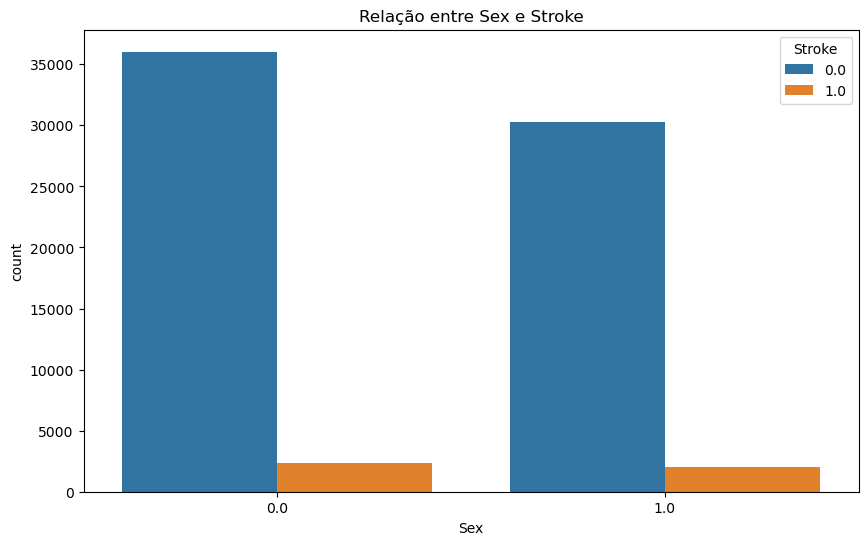


Tabela de contingência entre HighChol e Stroke:
Stroke      0.0   1.0
HighChol             
0.0       32295  1234
1.0       34002  3161
Chi-square: 703.07, p-value: 0.0000
A variável HighChol tem relação estatisticamente significativa com Stroke (p<0.05)


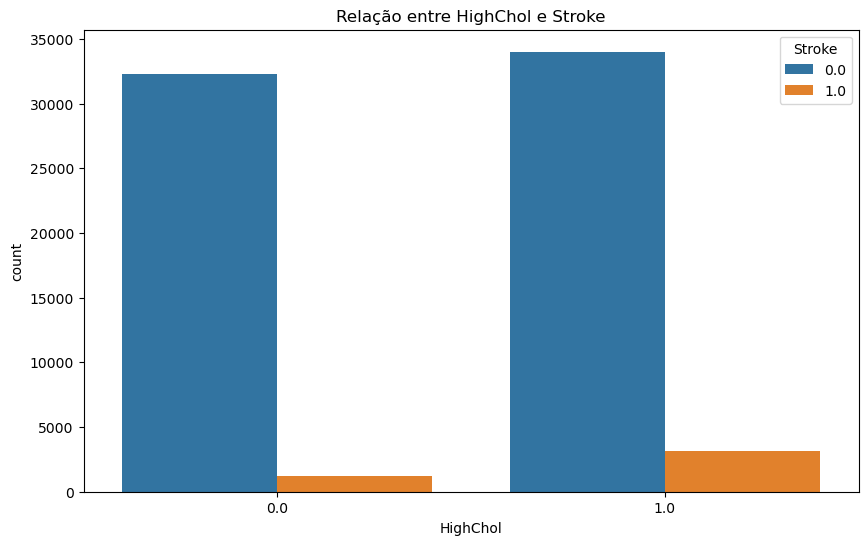


Tabela de contingência entre CholCheck e Stroke:
Stroke       0.0   1.0
CholCheck             
0.0         1700    49
1.0        64597  4346
Chi-square: 35.28, p-value: 0.0000
A variável CholCheck tem relação estatisticamente significativa com Stroke (p<0.05)


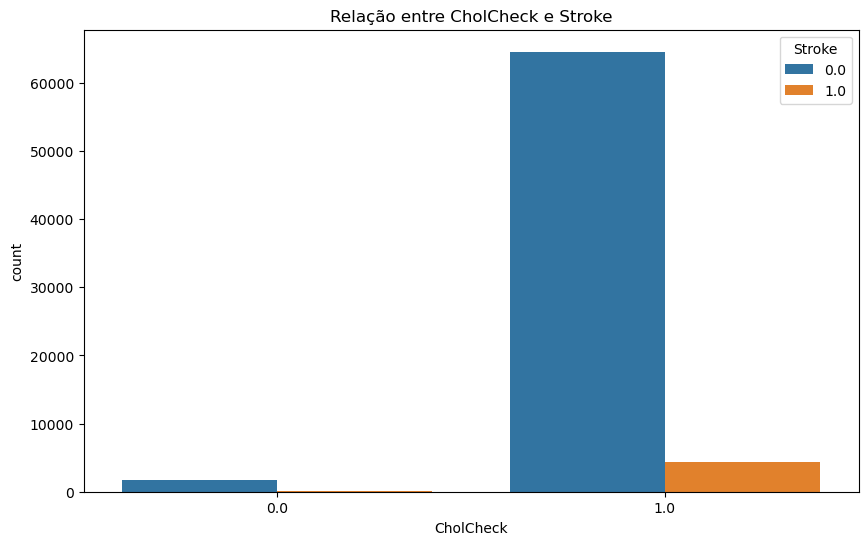


Tabela de contingência entre Smoker e Stroke:
Stroke    0.0   1.0
Smoker             
0.0     35339  1755
1.0     30958  2640
Chi-square: 295.01, p-value: 0.0000
A variável Smoker tem relação estatisticamente significativa com Stroke (p<0.05)


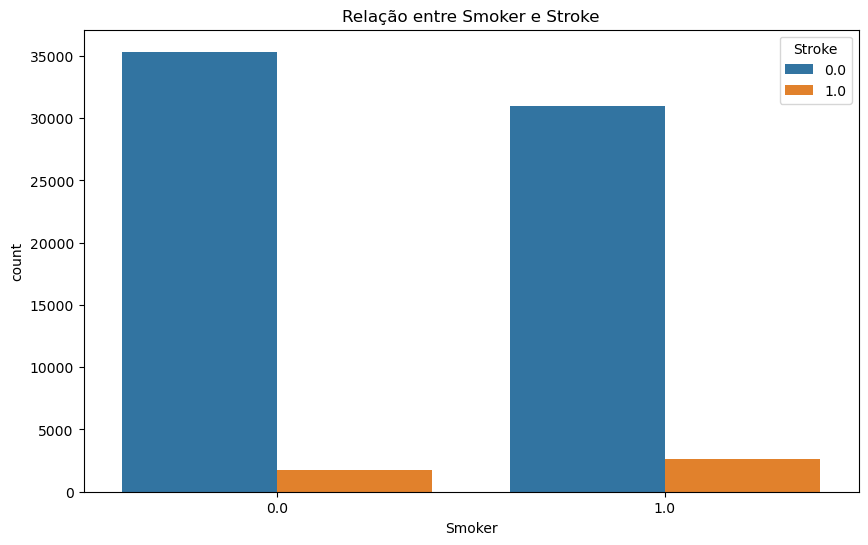


Tabela de contingência entre HeartDiseaseorAttack e Stroke:
Stroke                  0.0   1.0
HeartDiseaseorAttack             
0.0                   57851  2392
1.0                    8446  2003
Chi-square: 3525.26, p-value: 0.0000
A variável HeartDiseaseorAttack tem relação estatisticamente significativa com Stroke (p<0.05)


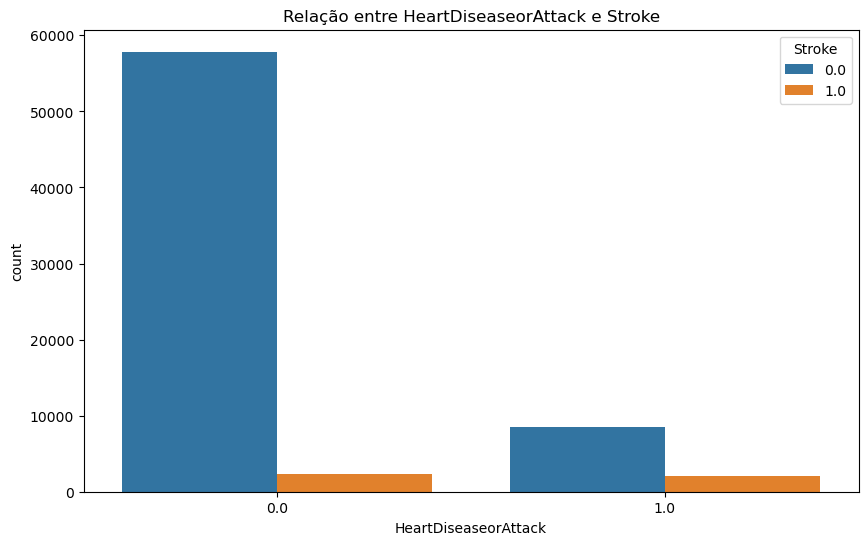


Tabela de contingência entre PhysActivity e Stroke:
Stroke          0.0   1.0
PhysActivity             
0.0           19064  1929
1.0           47233  2466
Chi-square: 451.53, p-value: 0.0000
A variável PhysActivity tem relação estatisticamente significativa com Stroke (p<0.05)


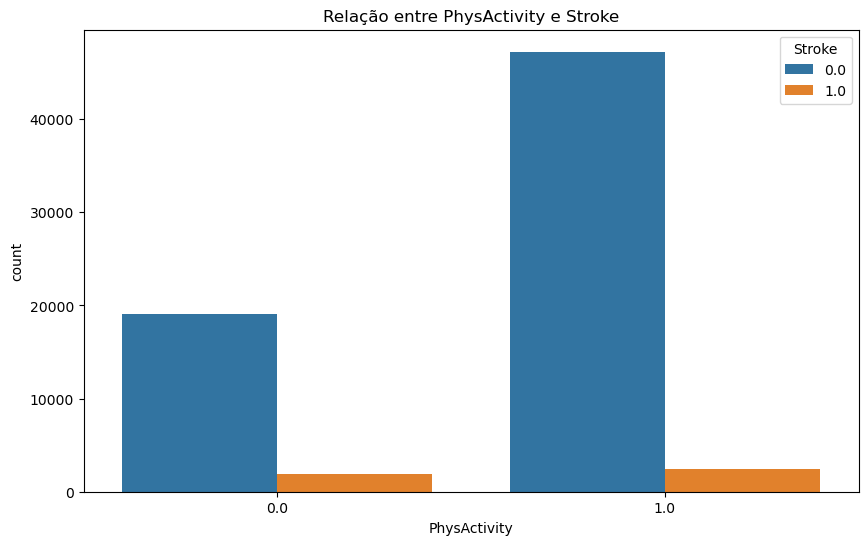


Tabela de contingência entre Fruits e Stroke:
Stroke    0.0   1.0
Fruits             
0.0     25662  1781
1.0     40635  2614
Chi-square: 5.65, p-value: 0.0175
A variável Fruits tem relação estatisticamente significativa com Stroke (p<0.05)


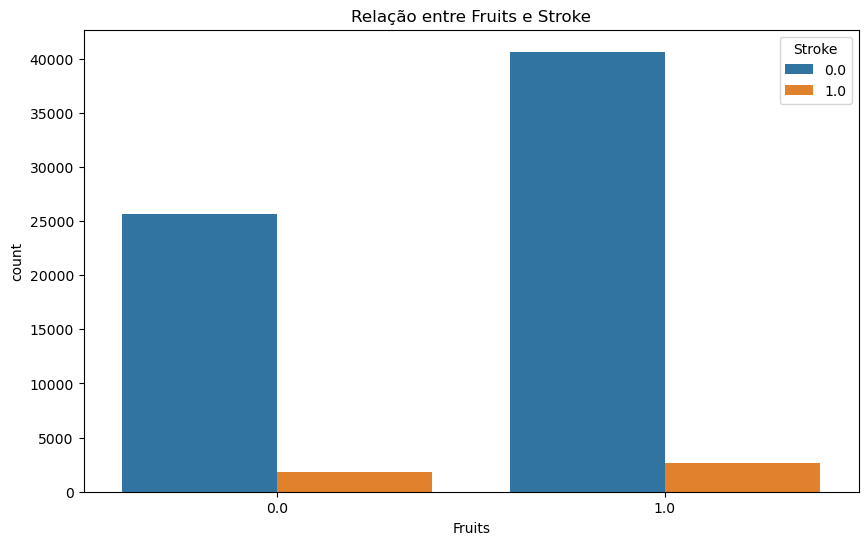


Tabela de contingência entre Veggies e Stroke:
Stroke     0.0   1.0
Veggies             
0.0      13672  1260
1.0      52625  3135
Chi-square: 159.70, p-value: 0.0000
A variável Veggies tem relação estatisticamente significativa com Stroke (p<0.05)


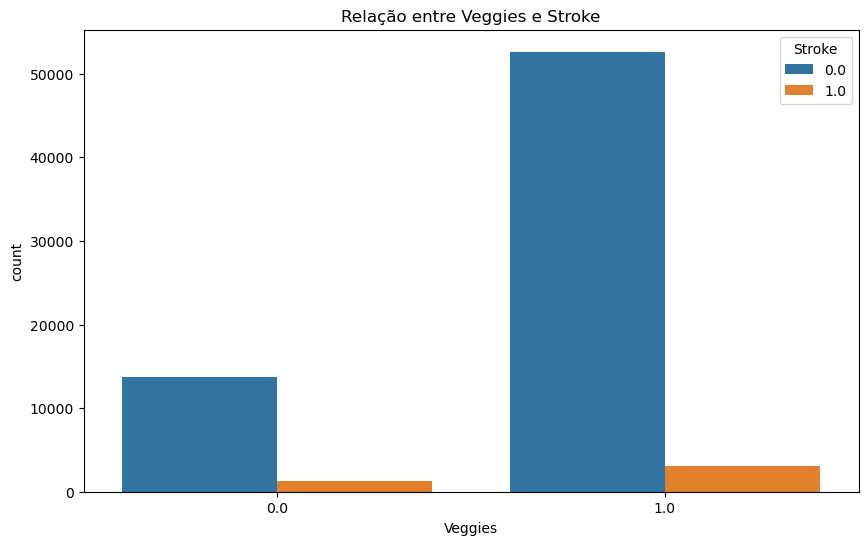


Tabela de contingência entre HvyAlcoholConsump e Stroke:
Stroke               0.0   1.0
HvyAlcoholConsump             
0.0                63384  4288
1.0                 2913   107
Chi-square: 38.21, p-value: 0.0000
A variável HvyAlcoholConsump tem relação estatisticamente significativa com Stroke (p<0.05)


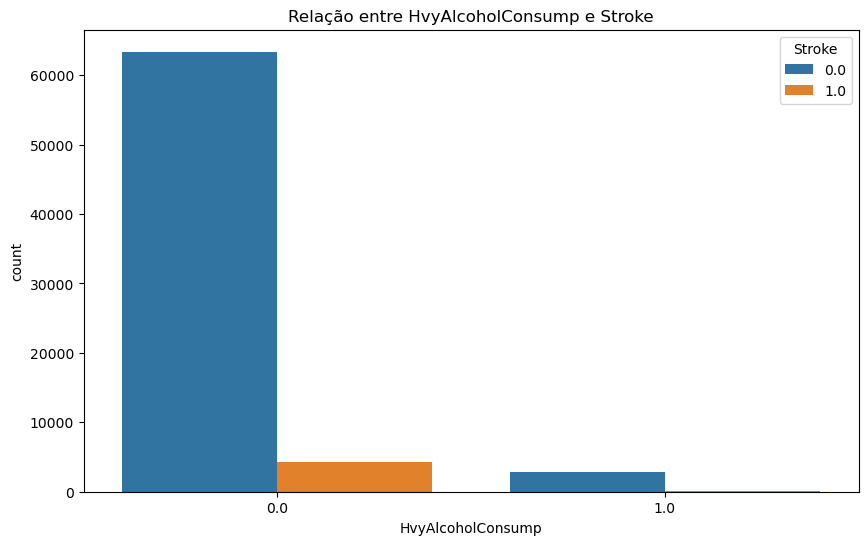


Tabela de contingência entre GenHlth e Stroke:
Stroke     0.0   1.0
GenHlth             
1.0       8160   122
2.0      19353   519
3.0      22200  1227
4.0      11897  1406
5.0       4687  1121
Chi-square: 2938.63, p-value: 0.0000
A variável GenHlth tem relação estatisticamente significativa com Stroke (p<0.05)


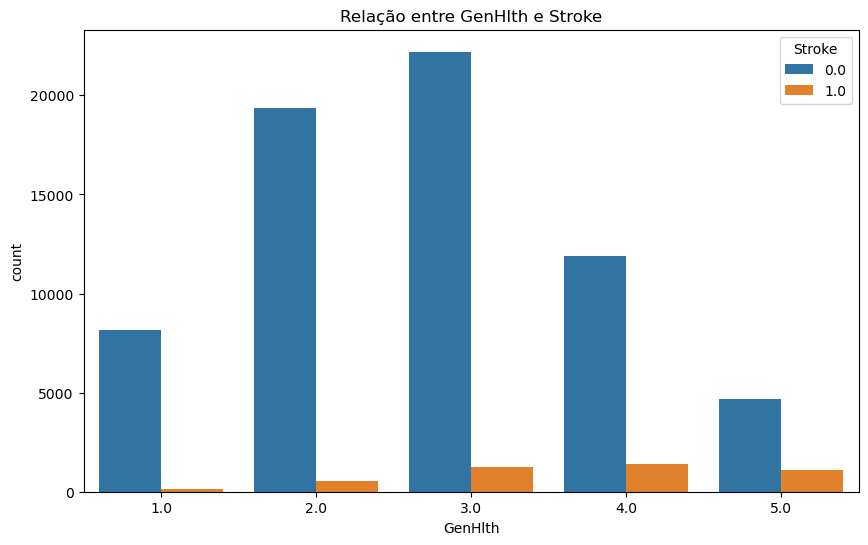


Tabela de contingência entre DiffWalk e Stroke:
Stroke      0.0   1.0
DiffWalk             
0.0       50968  1858
1.0       15329  2537
Chi-square: 2611.38, p-value: 0.0000
A variável DiffWalk tem relação estatisticamente significativa com Stroke (p<0.05)


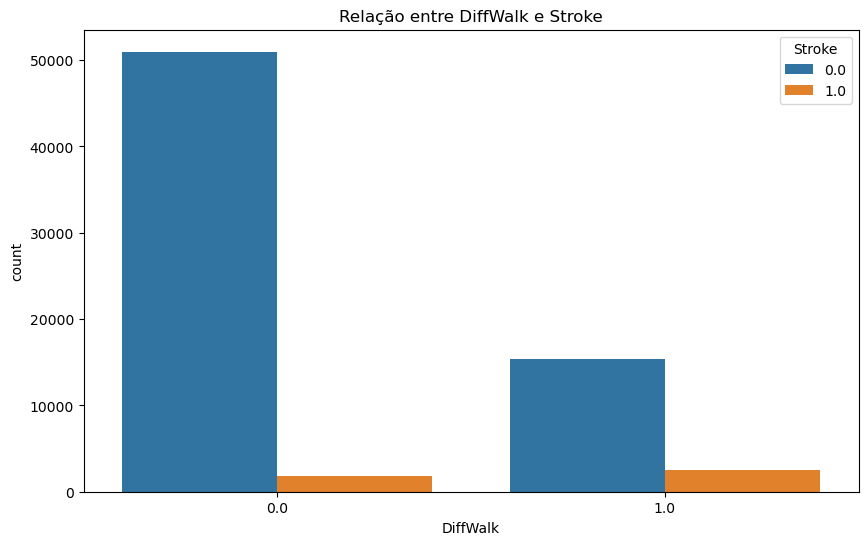


Tabela de contingência entre HighBP e Stroke:
Stroke    0.0   1.0
HighBP             
0.0     30034   826
1.0     36263  3569
Chi-square: 1176.40, p-value: 0.0000
A variável HighBP tem relação estatisticamente significativa com Stroke (p<0.05)


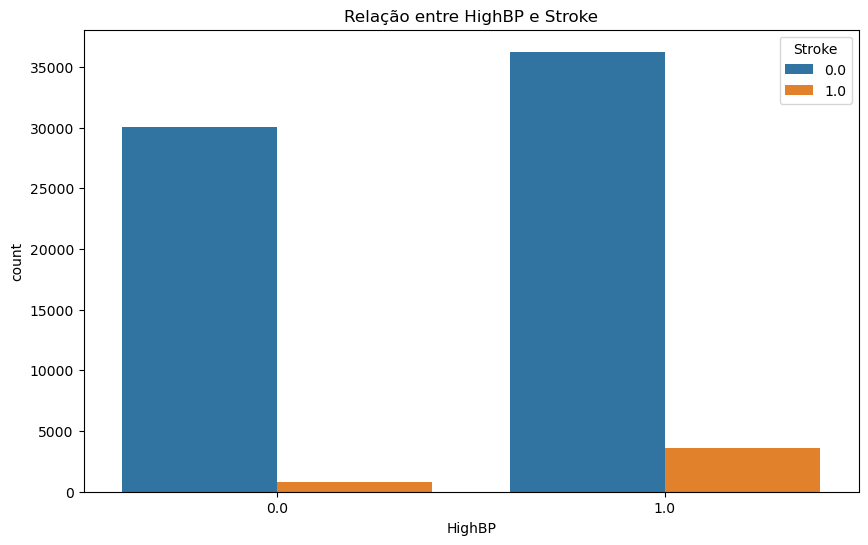


Tabela de contingência entre Diabetes e Stroke:
Stroke      0.0   1.0
Diabetes             
0.0       34219  1127
1.0       32078  3268
Chi-square: 1111.08, p-value: 0.0000
A variável Diabetes tem relação estatisticamente significativa com Stroke (p<0.05)


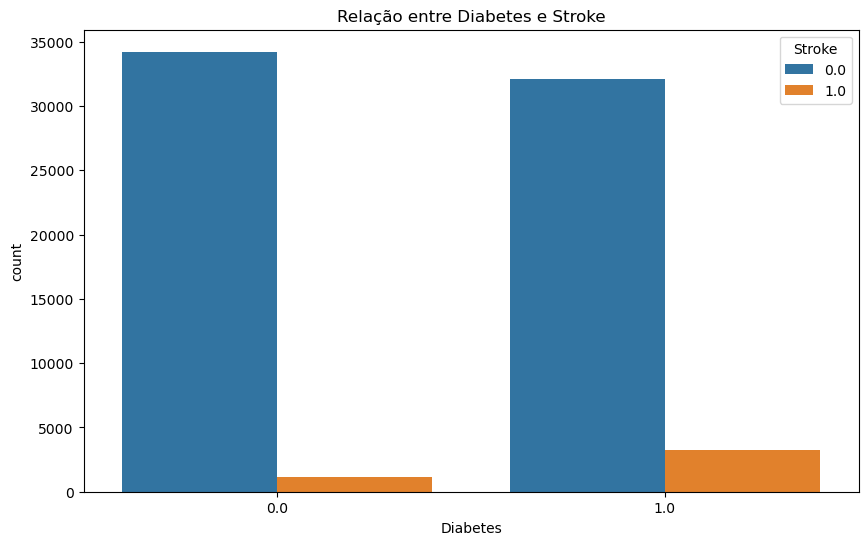


Estatísticas de Age por grupo de Stroke:
          count      mean       std  min  25%   50%   75%   max
Stroke                                                         
0.0     66297.0  8.493084  2.868006  1.0  7.0   9.0  11.0  13.0
1.0      4395.0  9.956314  2.181751  1.0  9.0  10.0  12.0  13.0
T-statistic: 42.11, p-value: 0.0000
A diferença nas médias de Age entre os grupos é estatisticamente significativa (p<0.05)


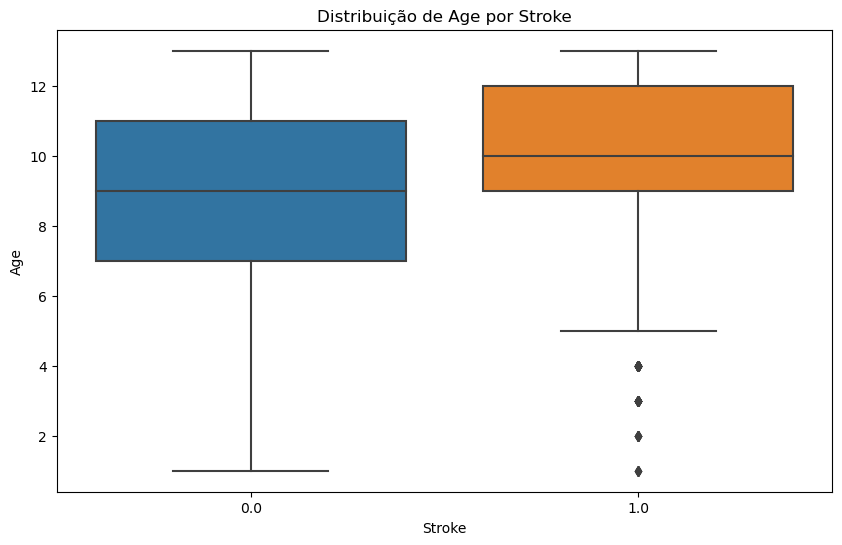


Estatísticas de BMI por grupo de Stroke:
          count       mean       std   min   25%   50%   75%   max
Stroke                                                            
0.0     66297.0  29.814984  7.096584  12.0  25.0  29.0  33.0  98.0
1.0      4395.0  30.490557  7.342743  14.0  26.0  29.0  34.0  98.0
T-statistic: 5.92, p-value: 0.0000
A diferença nas médias de BMI entre os grupos é estatisticamente significativa (p<0.05)


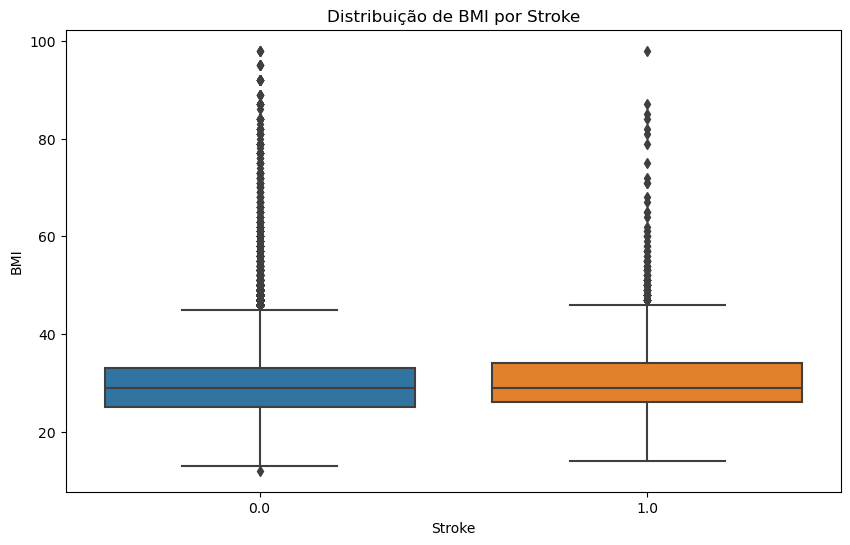


Estatísticas de MentHlth por grupo de Stroke:
          count      mean        std  min  25%  50%   75%   max
Stroke                                                         
0.0     66297.0  3.568714   7.934077  0.0  0.0  0.0   2.0  30.0
1.0      4395.0  6.517406  10.590394  0.0  0.0  0.0  10.0  30.0
T-statistic: 18.12, p-value: 0.0000
A diferença nas médias de MentHlth entre os grupos é estatisticamente significativa (p<0.05)


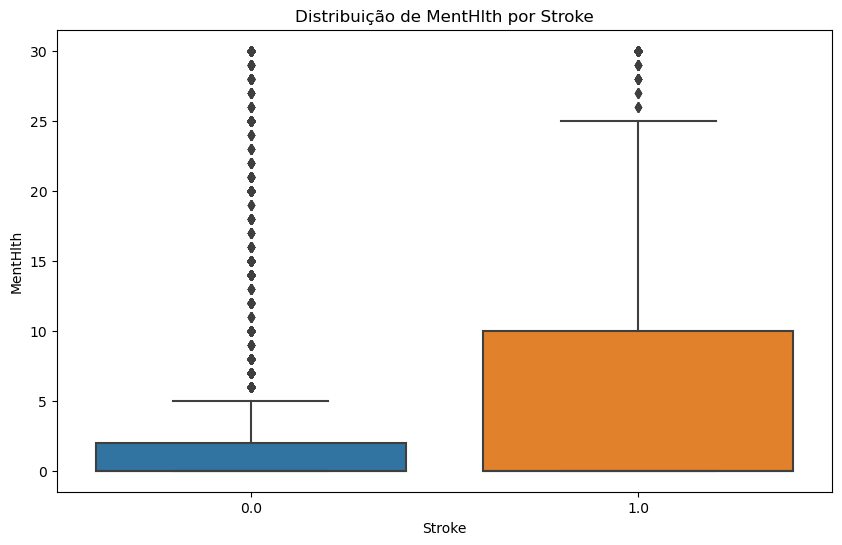


Estatísticas de PhysHlth por grupo de Stroke:
          count       mean        std  min  25%  50%   75%   max
Stroke                                                          
0.0     66297.0   5.384271   9.710885  0.0  0.0  0.0   5.0  30.0
1.0      4395.0  12.238680  12.729000  0.0  0.0  6.0  30.0  30.0
T-statistic: 35.03, p-value: 0.0000
A diferença nas médias de PhysHlth entre os grupos é estatisticamente significativa (p<0.05)


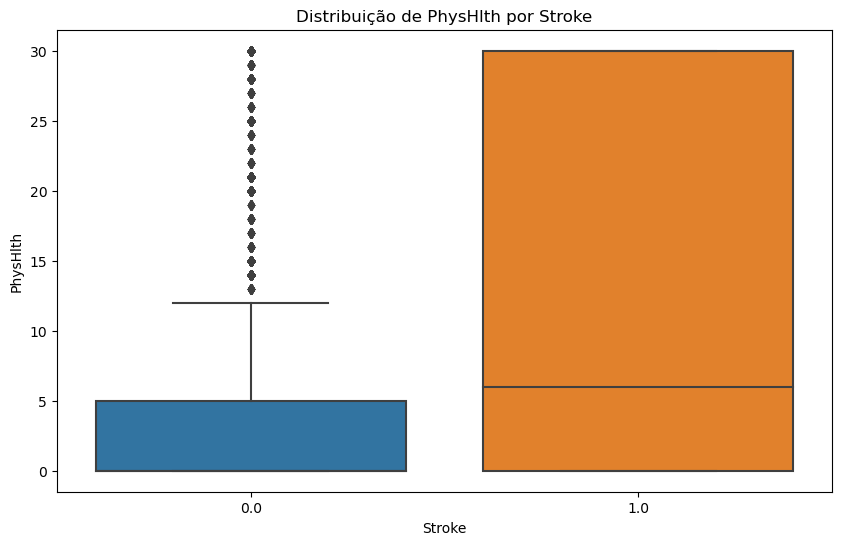

In [ ]:
# Para variáveis categóricas: tabelas de contingência
for col in categorical_cols:
    if col != 'Stroke':
        print(f"\nTabela de contingência entre {col} e Stroke:")
        contingency_table = pd.crosstab(df[col], df['Stroke'])
        print(contingency_table)
        
        # Chi-square test
        chi2, p, _, _ = stats.chi2_contingency(contingency_table)
        print(f"Chi-square: {chi2:.2f}, p-value: {p:.4f}")
        if p < 0.05:
            print(f"A variável {col} tem relação estatisticamente significativa com Stroke (p<0.05)")
        else:
            print(f"A variável {col} NÃO tem relação estatisticamente significativa com Stroke (p>=0.05)")
        
        # Visualização
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='Stroke', data=df)
        plt.title(f'Relação entre {col} e Stroke')
        # plt.savefig(f'C:/Users/gabri/Downloads/Diabetes/{col}_vs_stroke.png')
        plt.show()
        plt.close()

# Para variáveis numéricas: análise por grupo
for col in numerical_cols:
    print(f"\nEstatísticas de {col} por grupo de Stroke:")
    print(df.groupby('Stroke')[col].describe())
    
    # T-test para comparar médias
    stroke_yes = df[df['Stroke'] == 1][col]
    stroke_no = df[df['Stroke'] == 0][col]
    t_stat, p_val = stats.ttest_ind(stroke_yes, stroke_no, equal_var=False)
    print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")
    if p_val < 0.05:
        print(f"A diferença nas médias de {col} entre os grupos é estatisticamente significativa (p<0.05)")
    else:
        print(f"A diferença nas médias de {col} entre os grupos NÃO é estatisticamente significativa (p>=0.05)")
    
    # Visualização
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Stroke', y=col, data=df)
    plt.title(f'Distribuição de {col} por Stroke')
    # plt.savefig(f'C:/Users/gabri/Downloads/Diabetes/{col}_by_stroke.png')
    plt.show()
    plt.close()

### Análise de Correlação

Correlação de cada variável com Stroke:
Stroke                  1.000000
HeartDiseaseorAttack    0.223394
DiffWalk                0.192266
GenHlth                 0.189447
PhysHlth                0.164488
HighBP                  0.129060
Diabetes                0.125427
Age                     0.123879
HighChol                0.099786
MentHlth                0.087303
Smoker                  0.064658
BMI                     0.022931
CholCheck               0.022529
Sex                     0.003822
Fruits                 -0.008996
HvyAlcoholConsump      -0.023395
Veggies                -0.047601
PhysActivity           -0.079985
Name: Stroke, dtype: float64


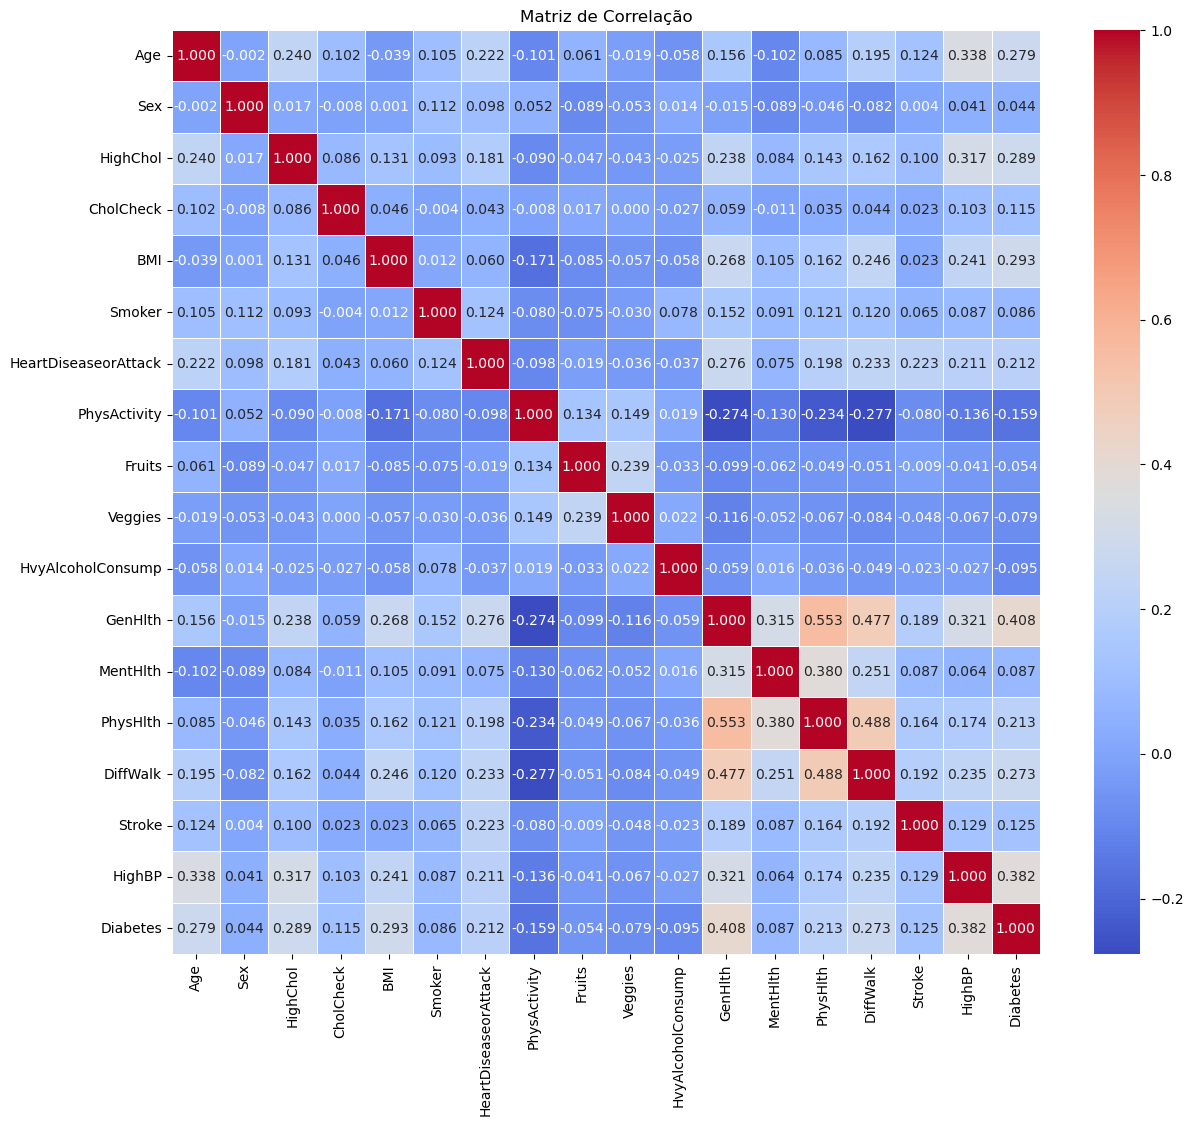

Matriz de correlação salva como 'correlation_matrix.png'


In [ ]:
# Convertendo variáveis categóricas para numéricas para cálculo de correlação
df_corr = df.copy()
for col in categorical_cols:
    if df_corr[col].nunique() <= 2:  # Para variáveis binárias
        pass  # Já são 0 e 1, não precisamos converter
    else:  # Para variáveis categóricas com mais de 2 categorias
        le = LabelEncoder()
        df_corr[col] = le.fit_transform(df_corr[col])

# Calculando a matriz de correlação
correlation_matrix = df_corr.corr()

# Ordenando correlações com a variável alvo
target_correlations = correlation_matrix['Stroke'].sort_values(ascending=False)
print("Correlação de cada variável com Stroke:")
print(target_correlations)

# Visualizando a matriz de correlação
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Matriz de Correlação')
# plt.savefig('C:/Users/gabri/Downloads/Diabetes/correlation_matrix.png')
plt.show()
plt.close()

print("Matriz de correlação salva como 'correlation_matrix.png'")

### Conclusão

In [ ]:
# Identificando variáveis com baixa correlação com a variável alvo
low_corr_threshold = 0.05
low_corr_vars = target_correlations[abs(target_correlations) < low_corr_threshold].index.tolist()
if 'Stroke' in low_corr_vars:
    low_corr_vars.remove('Stroke')

print("Variáveis com baixa correlação com Stroke (abaixo de 0.05):")
print(low_corr_vars)

# Identificando variáveis altamente correlacionadas entre si (multicolinearidade)
high_corr_threshold = 0.7
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

if high_corr_pairs:
    print("\nPares de variáveis altamente correlacionadas (potencial multicolinearidade):")
    for var1, var2, corr in high_corr_pairs:
        print(f"{var1} e {var2}: {corr:.2f}")

# Recomendações baseadas na análise
print("\nRecomendações com base na análise:")
if len(low_corr_vars) > 0:
    print(f"- Considere remover as variáveis com baixa correlação: {', '.join(low_corr_vars)}")
if high_corr_pairs:
    print("- Avalie a possibilidade de remover uma variável de cada par altamente correlacionado")

if imbalance_ratio > 10:
    print("- O dataset está muito desbalanceado. Considere técnicas como:")
    print("  * SMOTE (Synthetic Minority Over-sampling Technique)")
    print("  * Random Under-sampling da classe majoritária")
    print("  * Ajuste de pesos no modelo")

print("\nVariáveis mais importantes para predição de AVC (baseado na correlação):")
top_features = target_correlations[target_correlations.index != 'Stroke'].abs().sort_values(ascending=False).head(5).index.tolist()
for i, feature in enumerate(top_features):
    corr_value = target_correlations[feature]
    print(f"{i+1}. {feature}: {corr_value:.4f}")

Variáveis com baixa correlação com Stroke (abaixo de 0.05):
['BMI', 'CholCheck', 'Sex', 'Fruits', 'HvyAlcoholConsump', 'Veggies']

Recomendações com base na análise:
- Considere remover as variáveis com baixa correlação: BMI, CholCheck, Sex, Fruits, HvyAlcoholConsump, Veggies
- O dataset está muito desbalanceado. Considere técnicas como:
  * SMOTE (Synthetic Minority Over-sampling Technique)
  * Random Under-sampling da classe majoritária
  * Ajuste de pesos no modelo

Variáveis mais importantes para predição de AVC (baseado na correlação):
1. HeartDiseaseorAttack: 0.2234
2. DiffWalk: 0.1923
3. GenHlth: 0.1894
4. PhysHlth: 0.1645
5. HighBP: 0.1291


It can be seen that features like CholCheck and HvyAlcoholConsump are heavily unbalanced and may skew or introduce bias in the model thus they will not be considered while building the model.

In [ ]:
# #Building a heatmap using correlation
# plt.figure(figsize=(15,10))
# mask=np.triu(df.corr())
# sns.heatmap(df.corr(),mask=mask,annot=True,cmap='Blues_r')
# plt.show()

Now using this heatmap those features that might not contribute enough to the model depending on their correlation to the target(Stroke) column will be dropped from the dataset

# Antigo código

## Feature Engineering

In [ ]:
#dropping features that are not required
# data=df.drop(['Sex','CholCheck','Smoker','Fruits','Veggies','HvyAlcoholConsump','MentHlth'],axis=1)
#data = df.drop(['BMI', 'CholCheck', 'Sex', 'Fruits', 'HvyAlcoholConsump', 'Veggies'], axis=1)
data = df.drop(['Sex', 'Fruits', 'Veggies'], axis=1)
data.head()

,Age,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,26.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,1.0,29.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#splitting the data into input data features and target 
X=data.drop('Diabetes',axis=1)
y=data['Diabetes']

## Train-Test-Split and Scaling

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=105,stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(49484, 14)
(21208, 14)


In [ ]:
#scaling the data so that comparatively larger values do not make the model biased
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Certifique-se de ter arrays e não DataFrames para indexação com [train_idx]
X_train_array = X_train if isinstance(X_train, np.ndarray) else X_train.to_numpy()
y_train_array = y_train if isinstance(y_train, np.ndarray) else y_train.to_numpy()
X_test_array = X_test if isinstance(X_test, np.ndarray) else X_test.to_numpy()
y_test_array = y_test if isinstance(y_test, np.ndarray) else y_test.to_numpy()

## Defining Generic Model

In [ ]:

def model_cross_val(model, X, y, cv=5, show_confusion_matrix=False):
    print(f"\n=== {model.__class__.__name__} ===")
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    accs, f1s, precs, recalls, aucs = [], [], [], [], []
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    
    # Para matriz de confusão agregada (OPÇÃO 1)
    all_y_true = []
    all_y_pred = []
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        # Separar dados do fold
        X_fold_train, X_fold_val = X[train_idx], X[val_idx]
        y_fold_train, y_fold_val = y[train_idx], y[val_idx]
        
        # IMPORTANTE: Normalizar apenas dentro do fold
        scaler = StandardScaler()
        X_fold_train_scaled = scaler.fit_transform(X_fold_train)
        X_fold_val_scaled = scaler.transform(X_fold_val)  # Apenas transform, não fit!
        
        # Treinar e predizer
        model.fit(X_fold_train_scaled, y_fold_train)
        y_pred = model.predict(X_fold_val_scaled)
        
        # Armazenar para matriz de confusão agregada
        all_y_true.extend(y_fold_val)
        all_y_pred.extend(y_pred)
        
        # OPÇÃO 2: Matriz de confusão de cada fold (descomente se quiser ver todos)
        # if show_confusion_matrix:
        #     plt.figure(figsize=(6, 4))
        #     ConfusionMatrixDisplay.from_predictions(y_fold_val, y_pred)
        #     plt.title(f'{model.__class__.__name__} - Fold {fold+1}')
        #     plt.show()
        
        # Calcular métricas
        accs.append(accuracy_score(y_fold_val, y_pred))
        f1s.append(f1_score(y_fold_val, y_pred, zero_division=0))
        precs.append(precision_score(y_fold_val, y_pred, zero_division=0))
        recalls.append(recall_score(y_fold_val, y_pred, zero_division=0))
        
        # Probabilidades para AUC/ROC
        try:
            y_score = model.predict_proba(X_fold_val_scaled)[:, 1]
        except AttributeError:
            # Para modelos como SVC com decision_function
            y_score = model.decision_function(X_fold_val_scaled)
        
        fpr, tpr, _ = roc_curve(y_fold_val, y_score)
        aucs.append(roc_auc_score(y_fold_val, y_score))
        tprs.append(np.interp(mean_fpr, fpr, tpr))
    
    # Resultados finais
    print(f"Acurácia média: {np.mean(accs):.4f} ± {np.std(accs):.4f}")
    print(f"F1 média:       {np.mean(f1s):.4f} ± {np.std(f1s):.4f}")
    print(f"Precisão média: {np.mean(precs):.4f} ± {np.std(precs):.4f}")
    print(f"Recall médio:   {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
    print(f"AUC média:      {np.mean(aucs):.4f} ± {np.std(aucs):.4f}")
    
    # OPÇÃO 1: Matriz de confusão agregada de todos os folds (RECOMENDADO)
    if show_confusion_matrix:
        plt.figure(figsize=(6, 5))
        ConfusionMatrixDisplay.from_predictions(all_y_true, all_y_pred, cmap='Blues')
        plt.title(f'Matriz de Confusão Agregada - {model.__class__.__name__}')
        plt.show()
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    mean_tpr = np.mean(tprs, axis=0)
    std_tpr = np.std(tprs, axis=0)
    
    plt.plot(mean_fpr, mean_tpr, label=f"ROC (AUC = {np.mean(aucs):.3f} ± {np.std(aucs):.3f})")
    plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, alpha=0.2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model.__class__.__name__}")
    plt.legend()
    plt.grid()
    plt.show()
    
    return {
        'accuracy': np.mean(accs),
        'f1': np.mean(f1s),
        'precision': np.mean(precs),
        'recall': np.mean(recalls),
        'auc': np.mean(aucs)
    }


## Testing Different Models

In [ ]:
def grid_search_with_cv(model, param_grid, X, y, cv=5, scoring='recall'):
    """
    Grid Search com normalização correta dentro da CV
    """
    print(f"\n=== Grid Search - {model.__class__.__name__} ===")
    
    # Normalizar os dados de treino (apenas uma vez para o Grid Search)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Grid Search com CV interna
    grid_search = GridSearchCV(
        estimator=model, 
        param_grid=param_grid, 
        cv=cv, 
        scoring=scoring,  # Use 'f1' para dados desbalanceados
        verbose=1, 
        n_jobs=-1,
        error_score='raise'
    )
    
    grid_search.fit(X_scaled, y)
    
    print(f"Melhores parâmetros: {grid_search.best_params_}")
    print(f"Melhor score ({scoring}): {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_

In [ ]:
# Avaliação com CV corrigida
resultados = {}

# Realizar Grid Search para cada modelo
melhores_modelos = {}


### LOGISTIC REGRESSION

#### Testando o modelo puro


=== LogisticRegression ===
Acurácia média: 0.7465 ± 0.0024
F1 média:       0.7516 ± 0.0019
Precisão média: 0.7369 ± 0.0042
Recall médio:   0.7668 ± 0.0046
AUC média:      0.8221 ± 0.0033


<Figure size 600x500 with 0 Axes>

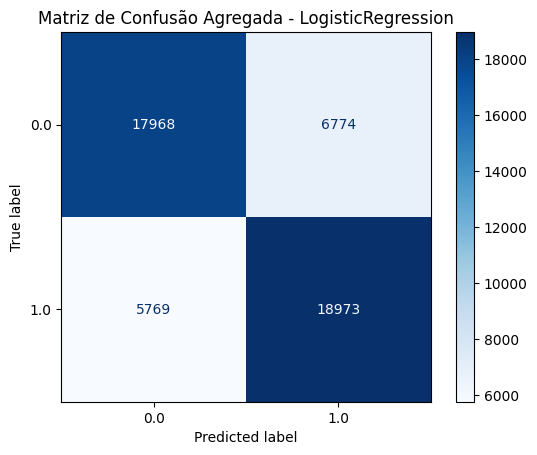

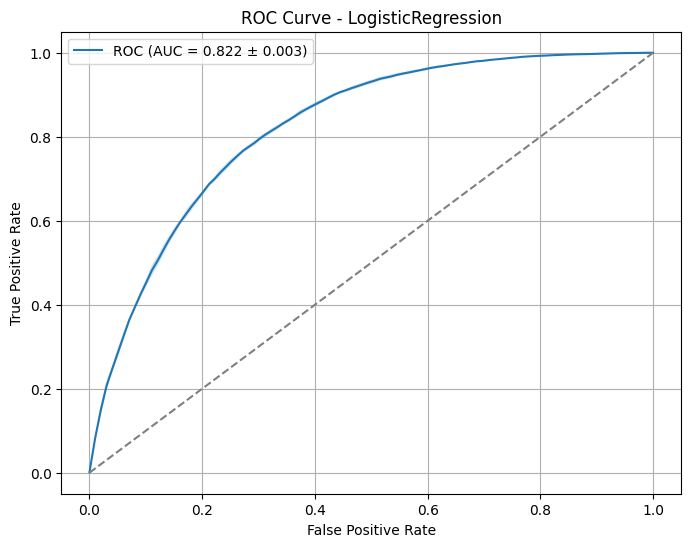

In [ ]:
# Definindo o modelo a ser testado
modelo = LogisticRegression()

# Para ver matriz de confusão, use show_confusion_matrix=True
_ = model_cross_val(modelo, X_train_array, y_train_array, show_confusion_matrix=True)

#### Testando o modelo após usar GridSearchCV

In [ ]:
param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],  # Compatíveis com l1
        'max_iter': [1000, 2000],
        'class_weight': ['balanced', None]
    }

melhor_modelo = grid_search_with_cv(
    modelo, 
    param_grid, 
    X_train_array, 
    y_train_array,
    cv=5
)

melhores_modelos['LogisticRegression'] = melhor_modelo


=== Grid Search - LogisticRegression ===
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Melhores parâmetros: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor score (recall): 0.7701



=== LogisticRegression ===
Acurácia média: 0.7464 ± 0.0026
F1 média:       0.7524 ± 0.0024
Precisão média: 0.7352 ± 0.0041
Recall médio:   0.7705 ± 0.0050
AUC média:      0.8220 ± 0.0033


<Figure size 600x500 with 0 Axes>

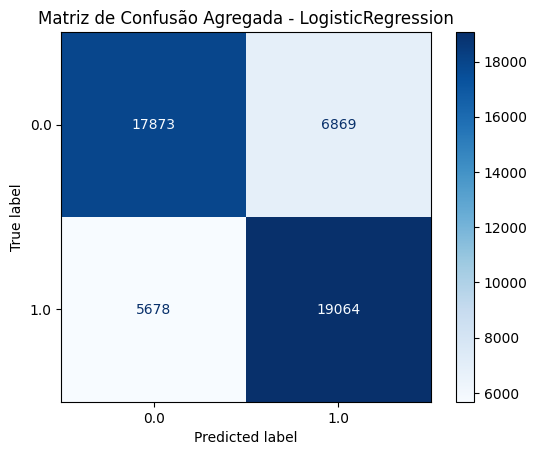

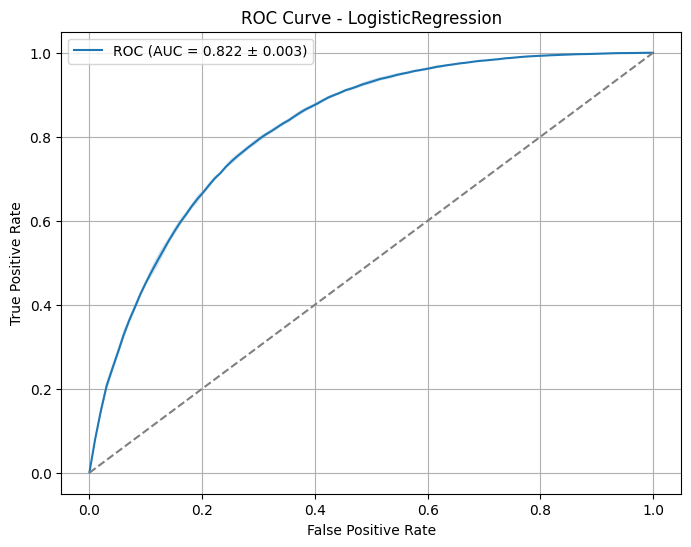

In [ ]:
# Para ver matriz de confusão, use show_confusion_matrix=True
resultados["LogisticRegression"] = model_cross_val(melhor_modelo, X_train_array, y_train_array, show_confusion_matrix=True)

### DECISION TREE

#### Testando o modelo puro


=== DecisionTreeClassifier ===
Acurácia média: 0.6605 ± 0.0032
F1 média:       0.6506 ± 0.0033
Precisão média: 0.6701 ± 0.0037
Recall médio:   0.6321 ± 0.0039
AUC média:      0.6670 ± 0.0031


<Figure size 600x500 with 0 Axes>

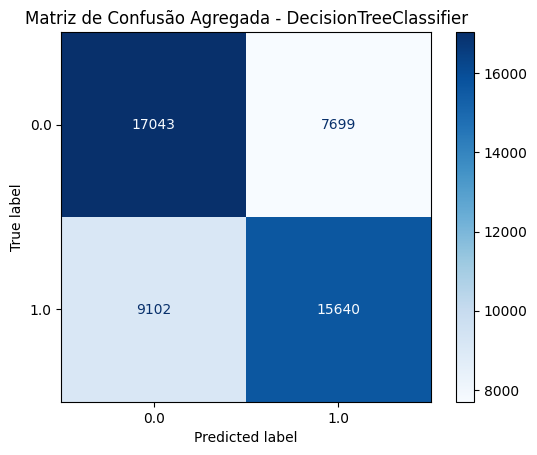

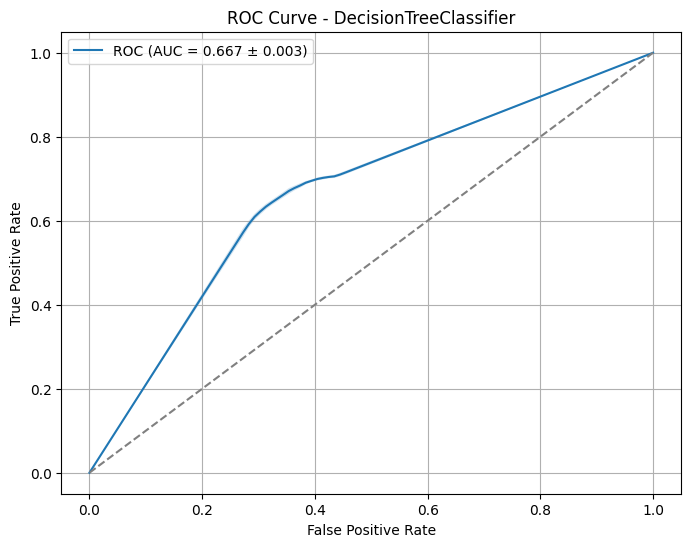

In [ ]:
# Definindo o modelo a ser testado
modelo = DecisionTreeClassifier()

# Para ver matriz de confusão, use show_confusion_matrix=True
_ = model_cross_val(modelo, X_train_array, y_train_array, show_confusion_matrix=True)

#### Testando o modelo após usar GridSearchCV

In [ ]:
param_grid = {
        'max_features': ['sqrt', 'log2', None],
        'ccp_alpha': [0.001, 0.01, 0.1],
        'max_depth': [5, 6, 7, 8, 9, 10],
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'class_weight': ['balanced', None]
    }

melhor_modelo = grid_search_with_cv(
    modelo, 
    param_grid, 
    X_train_array, 
    y_train_array,
    cv=5,
)

melhores_modelos['DecisionTreeClassifier'] = melhor_modelo


=== Grid Search - DecisionTreeClassifier ===
Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Melhores parâmetros: {'ccp_alpha': 0.1, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
Melhor score (recall): 0.8655



=== DecisionTreeClassifier ===
Acurácia média: 0.6097 ± 0.0897
F1 média:       0.4254 ± 0.3474
Precisão média: 0.3931 ± 0.3210
Recall médio:   0.4636 ± 0.3788
AUC média:      0.6097 ± 0.0897


<Figure size 600x500 with 0 Axes>

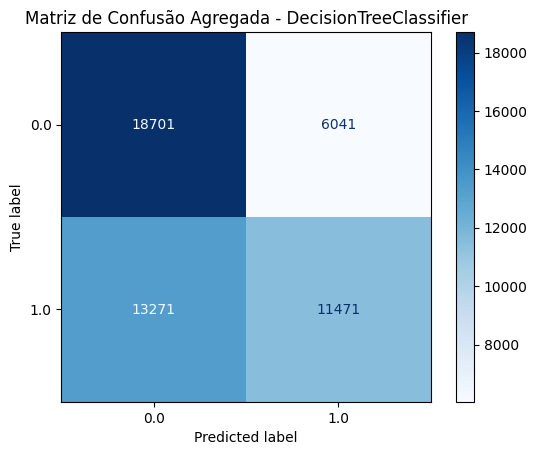

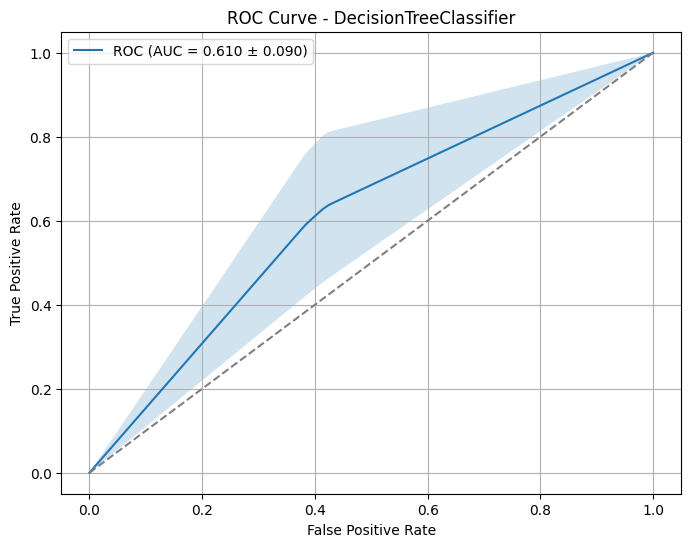

In [ ]:
# Para ver matriz de confusão, use show_confusion_matrix=True
resultados["DecisionTreeClassifier"] = model_cross_val(melhor_modelo, X_train_array, y_train_array, show_confusion_matrix=True)

### RANDOM FOREST

#### Testando o modelo puro


=== RandomForestClassifier ===
Acurácia média: 0.7156 ± 0.0029
F1 média:       0.7245 ± 0.0022
Precisão média: 0.7026 ± 0.0039
Recall médio:   0.7478 ± 0.0028
AUC média:      0.7824 ± 0.0042


<Figure size 600x500 with 0 Axes>

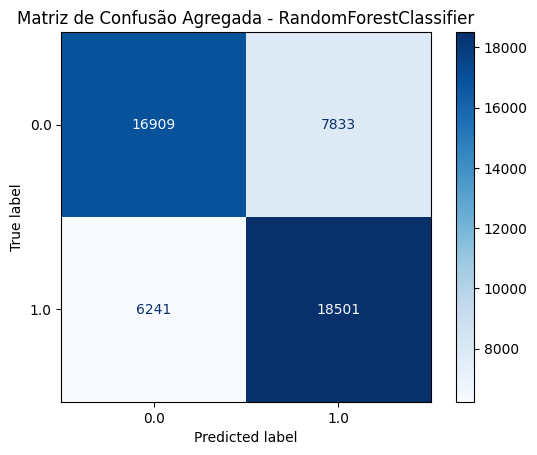

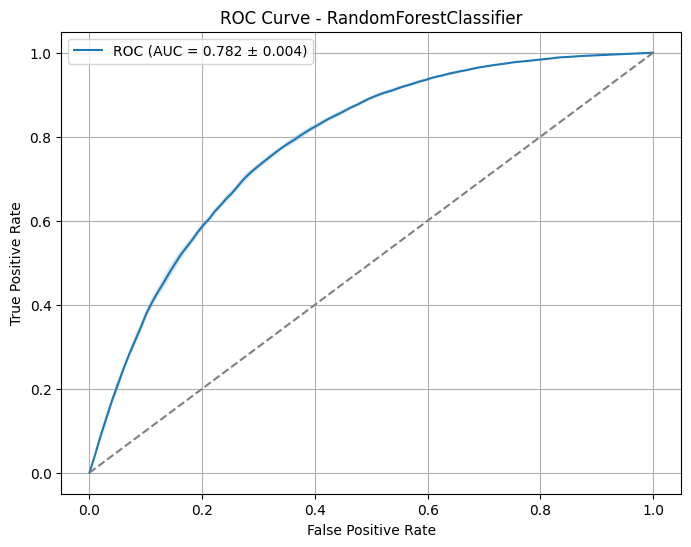

In [ ]:
# Definindo o modelo a ser testado
modelo = RandomForestClassifier()

# Para ver matriz de confusão, use show_confusion_matrix=True
_ = model_cross_val(modelo, X_train_array, y_train_array, show_confusion_matrix=True)

#### Testando o modelo após usar GridSearchCV

In [ ]:
param_grid = {
        'n_estimators': [100, 200, 300],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

melhor_modelo = grid_search_with_cv(
    modelo, 
    param_grid, 
    X_train_array, 
    y_train_array,
    cv=5
)

melhores_modelos['RandomForestClassifier'] = melhor_modelo


=== Grid Search - RandomForestClassifier ===
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Melhores parâmetros: {'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Melhor score (recall): 0.7874



=== RandomForestClassifier ===
Acurácia média: 0.7442 ± 0.0038
F1 média:       0.7546 ± 0.0030
Precisão média: 0.7253 ± 0.0049
Recall médio:   0.7863 ± 0.0032
AUC média:      0.8204 ± 0.0031


<Figure size 600x500 with 0 Axes>

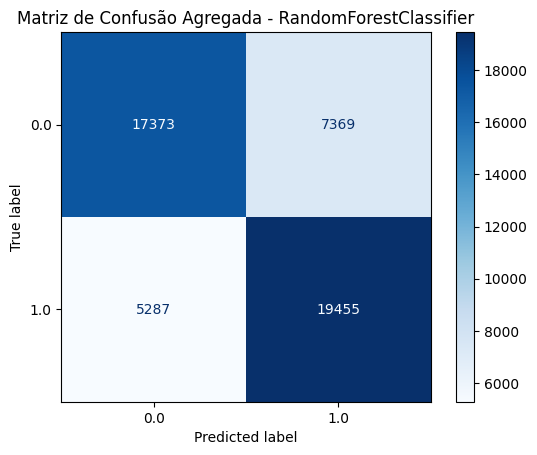

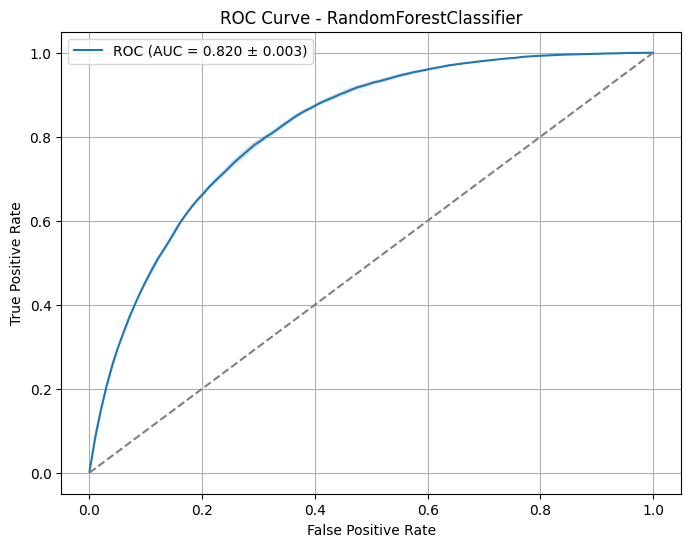

In [ ]:
# Para ver matriz de confusão, use show_confusion_matrix=True
resultados["RandomForestClassifier"] = model_cross_val(melhor_modelo, X_train_array, y_train_array, show_confusion_matrix=True)

### PERCEPTRON

#### Testando o modelo puro


=== Perceptron ===
Acurácia média: 0.6684 ± 0.0321
F1 média:       0.6959 ± 0.0520
Precisão média: 0.6402 ± 0.0220
Recall médio:   0.7727 ± 0.1145
AUC média:      0.7302 ± 0.0483


<Figure size 600x500 with 0 Axes>

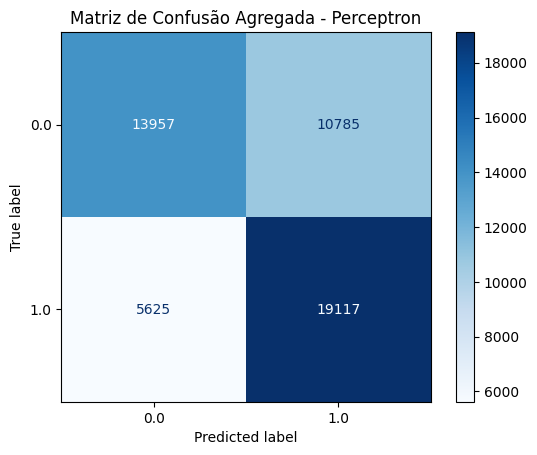

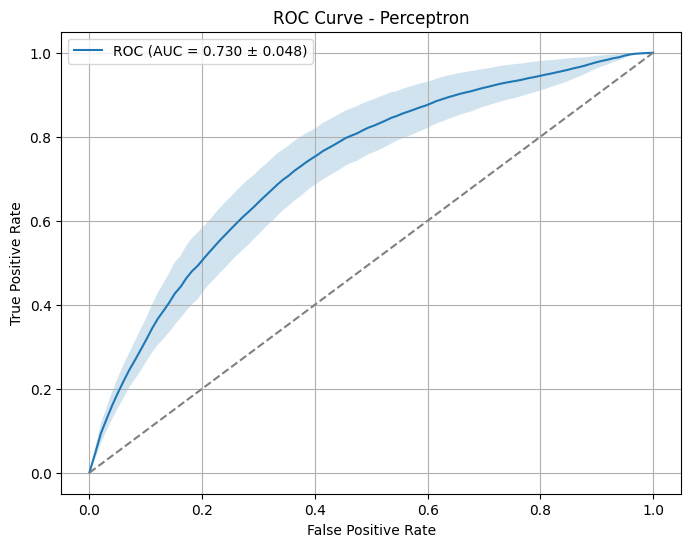

In [ ]:
# Definindo o modelo a ser testado
modelo = Perceptron()

# Para ver matriz de confusão, use show_confusion_matrix=True
_ = model_cross_val(modelo, X_train_array, y_train_array, show_confusion_matrix=True)

#### Testando o modelo após usar GridSearchCV

In [ ]:
param_grid = {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'penalty': ['l2', 'l1', 'elasticnet'],
        'max_iter': [1000, 2000, 3000],
        'class_weight': ['balanced', None]
    }

melhor_modelo = grid_search_with_cv(
    modelo, 
    param_grid, 
    X_train_array, 
    y_train_array,
    cv=5
)

melhores_modelos['Perceptron'] = melhor_modelo


=== Grid Search - Perceptron ===
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Melhores parâmetros: {'alpha': 0.001, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l1'}
Melhor score (recall): 0.8782



=== Perceptron ===
Acurácia média: 0.6283 ± 0.0938
F1 média:       0.5951 ± 0.2252
Precisão média: 0.6660 ± 0.0930
Recall médio:   0.6759 ± 0.3149
AUC média:      0.7296 ± 0.0491


<Figure size 600x500 with 0 Axes>

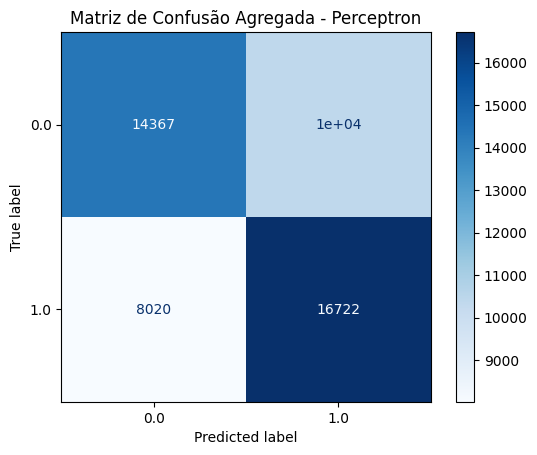

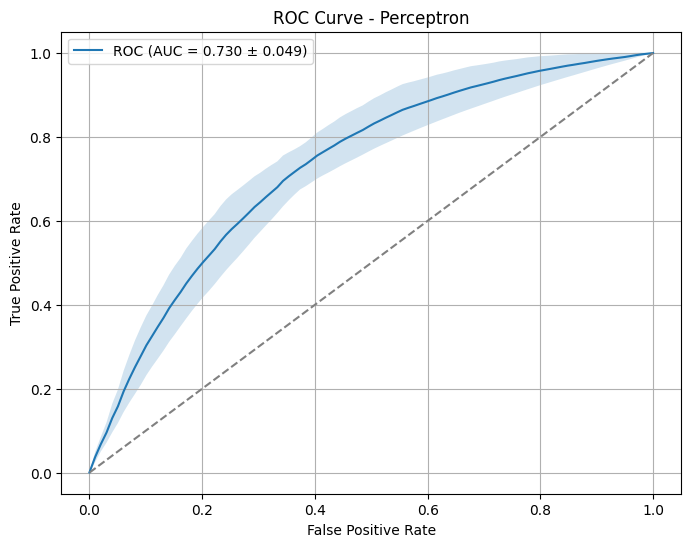

In [ ]:
# Para ver matriz de confusão, use show_confusion_matrix=True
resultados["Perceptron"] = model_cross_val(melhor_modelo, X_train_array, y_train_array, show_confusion_matrix=True)

### SVM

#### Testando o Modelo com hiperparametros default


=== SVC ===
Acurácia média: 0.7454 ± 0.0021
F1 média:       0.7583 ± 0.0012
Precisão média: 0.7217 ± 0.0040
Recall médio:   0.7988 ± 0.0040
AUC média:      0.8091 ± 0.0038


<Figure size 600x500 with 0 Axes>

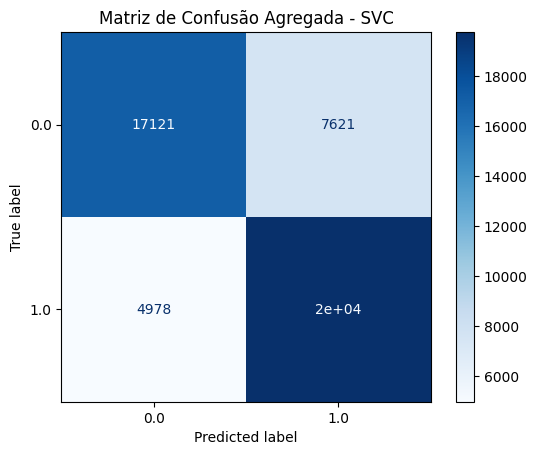

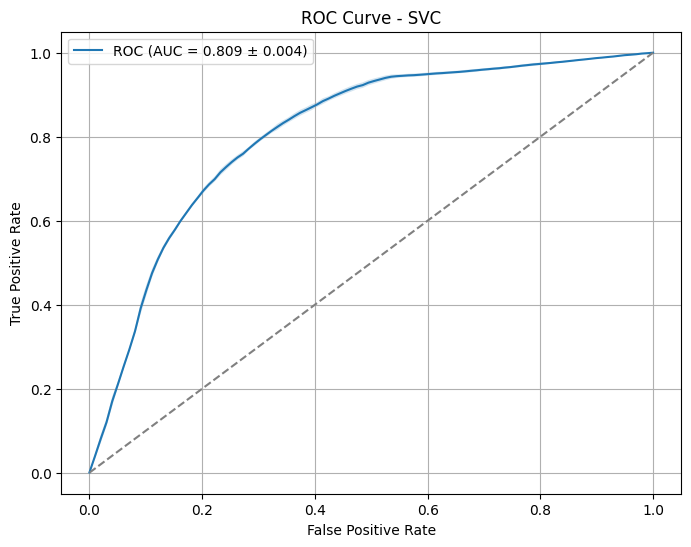

In [ ]:
# Definindo o modelo a ser testado
modelo = SVC()

# Para ver matriz de confusão, use show_confusion_matrix=True
_ = model_cross_val(modelo, X_train_array, y_train_array, show_confusion_matrix=True)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10], 
	'gamma': [0.1, 0.01, 0.001], 
	'kernel': ['linear', 'rbf']
    }

melhor_modelo = grid_search_with_cv(
    modelo, 
    param_grid, 
    X_train_array, 
    y_train_array,
    cv=5
)

melhores_modelos['SVM'] = melhor_modelo


=== Grid Search - SVC ===
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Melhores parâmetros: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Melhor score (recall): 0.8229



=== RandomForestClassifier ===
Acurácia média: 0.7431 ± 0.0031
F1 média:       0.7536 ± 0.0021
Precisão média: 0.7239 ± 0.0047
Recall médio:   0.7859 ± 0.0032
AUC média:      0.8204 ± 0.0030


<Figure size 600x500 with 0 Axes>

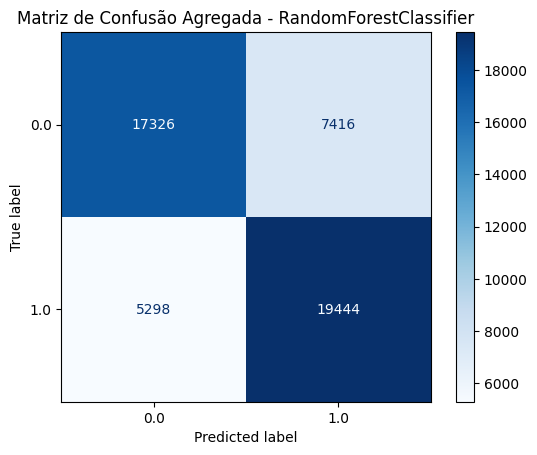

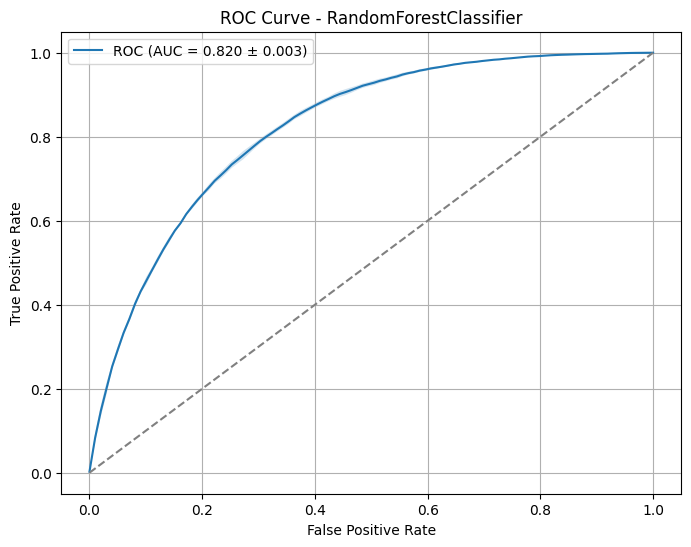

In [ ]:
resultados["SVM"] = model_cross_val(melhor_modelo, X_train_array, y_train_array, show_confusion_matrix=True)

### Gradient Boosting

#### Testando o Modelo com hiperparametros default


=== GradientBoostingClassifier ===
Acurácia média: 0.7503 ± 0.0041
F1 média:       0.7607 ± 0.0032
Precisão média: 0.7304 ± 0.0052
Recall médio:   0.7936 ± 0.0022
AUC média:      0.8273 ± 0.0037


<Figure size 600x500 with 0 Axes>

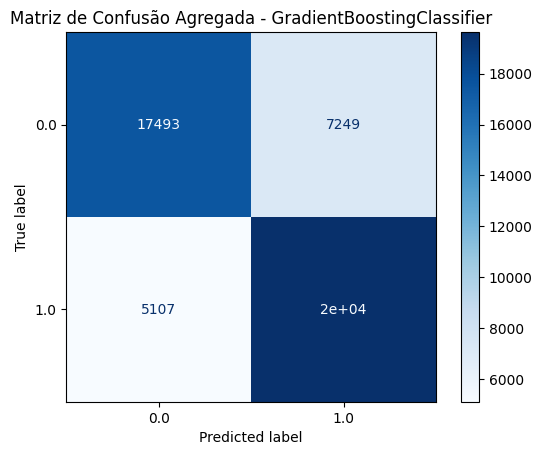

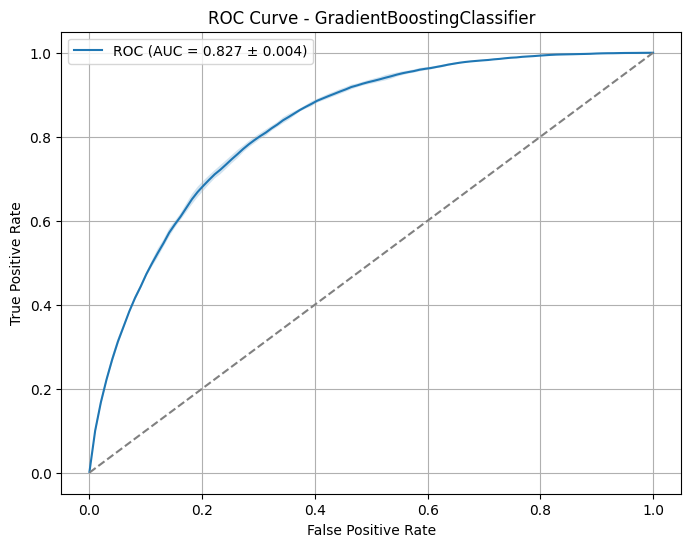

In [ ]:
# Definindo o modelo a ser testado
modelo = GradientBoostingClassifier()

# Para ver matriz de confusão, use show_confusion_matrix=True
_ = model_cross_val(modelo, X_train_array, y_train_array, show_confusion_matrix=True)

In [ ]:
param_grid = {
    "learning_rate": [0.05, 0.1, 0.5, 1],
    "min_samples_split": [2, 4],
    "min_samples_leaf": [1, 2],
    }

melhor_modelo = grid_search_with_cv(
    modelo, 
    param_grid, 
    X_train_array, 
    y_train_array,
    cv=5
)

melhores_modelos['Gradiente Boosting'] = melhor_modelo


=== Grid Search - GradientBoostingClassifier ===
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Melhores parâmetros: {'learning_rate': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor score (recall): 0.7930



=== GradientBoostingClassifier ===
Acurácia média: 0.7467 ± 0.0029
F1 média:       0.7576 ± 0.0015
Precisão média: 0.7263 ± 0.0050
Recall médio:   0.7918 ± 0.0034
AUC média:      0.8237 ± 0.0038


<Figure size 600x500 with 0 Axes>

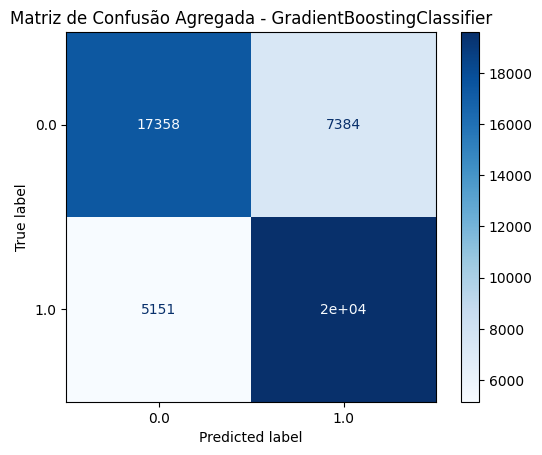

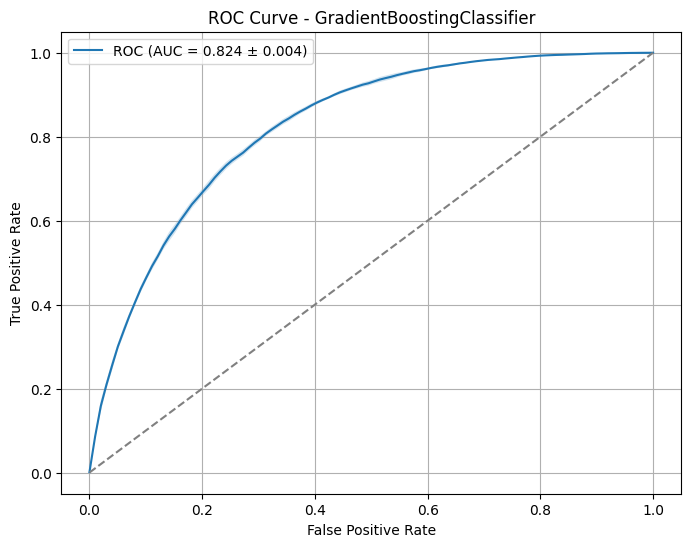

In [ ]:
resultados["Gradiente Boosting"] = model_cross_val(melhor_modelo, X_train_array, y_train_array, show_confusion_matrix=True)

### K - Nearest Neighbors


=== KNeighborsClassifier ===
Acurácia média: 0.7116 ± 0.0026
F1 média:       0.7198 ± 0.0031
Precisão média: 0.7000 ± 0.0035
Recall médio:   0.7409 ± 0.0071
AUC média:      0.7692 ± 0.0039


<Figure size 600x500 with 0 Axes>

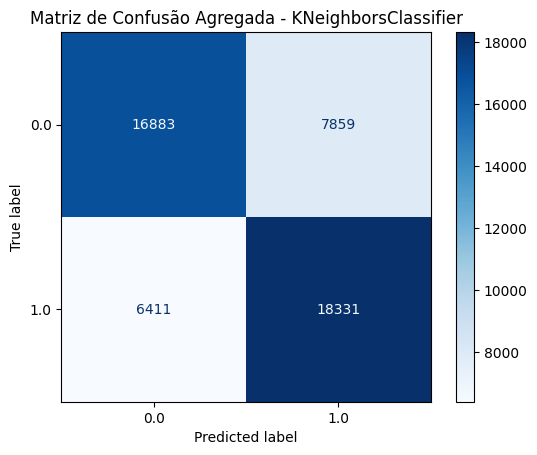

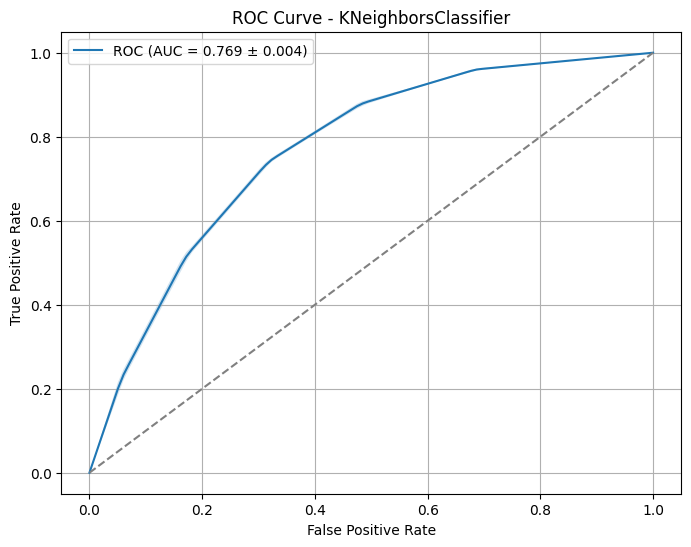

In [ ]:
# Definindo o modelo a ser testado
modelo = KNeighborsClassifier()

# Para ver matriz de confusão, use show_confusion_matrix=True
_ = model_cross_val(modelo, X_train_array, y_train_array, show_confusion_matrix=True)

In [ ]:
param_grid = {
    "n_neighbors": [3, 5, 7],
    "weights": ['uniform', 'distance'],
    "p": [1, 2, 3],
    }

melhor_modelo = grid_search_with_cv(
    modelo, 
    param_grid, 
    X_train_array, 
    y_train_array,
    cv=5
)

melhores_modelos['K-NN'] = melhor_modelo


=== Grid Search - KNeighborsClassifier ===
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Melhores parâmetros: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Melhor score (recall): 0.7537



=== KNeighborsClassifier ===
Acurácia média: 0.7179 ± 0.0033
F1 média:       0.7276 ± 0.0027
Precisão média: 0.7034 ± 0.0046
Recall médio:   0.7535 ± 0.0050
AUC média:      0.7819 ± 0.0040


<Figure size 600x500 with 0 Axes>

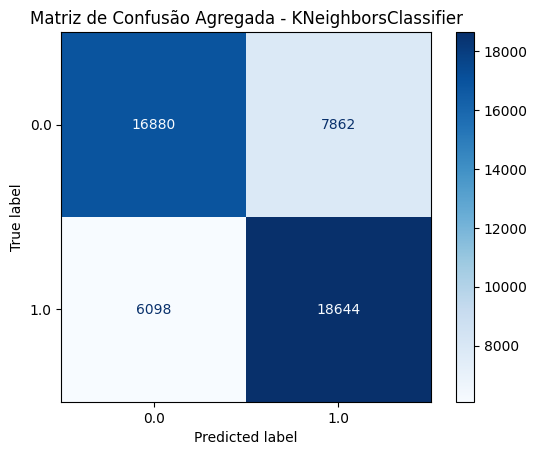

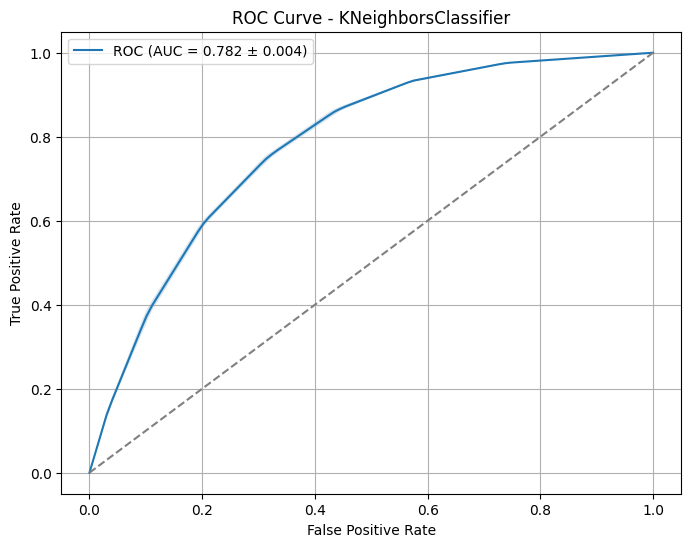

In [ ]:
resultados["K-NN"] = model_cross_val(melhor_modelo, X_train_array, y_train_array, show_confusion_matrix=True)

### Naive Bayes

GaussianNB e BernouliNB são modelos aparamétrocs e portanto não necessitam gridsearch


=== GaussianNB ===
Acurácia média: 0.7228 ± 0.0030
F1 média:       0.7208 ± 0.0039
Precisão média: 0.7261 ± 0.0035
Recall médio:   0.7156 ± 0.0074
AUC média:      0.7854 ± 0.0024


<Figure size 600x500 with 0 Axes>

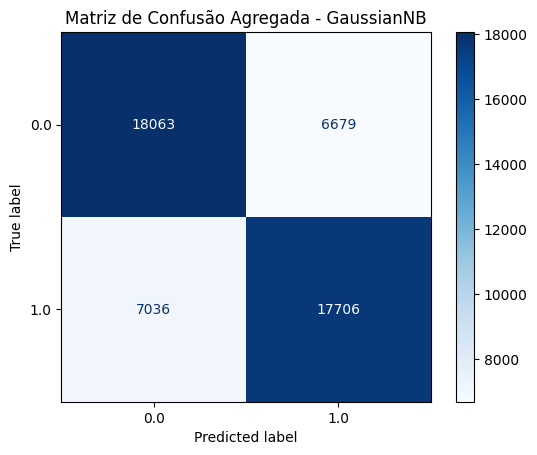

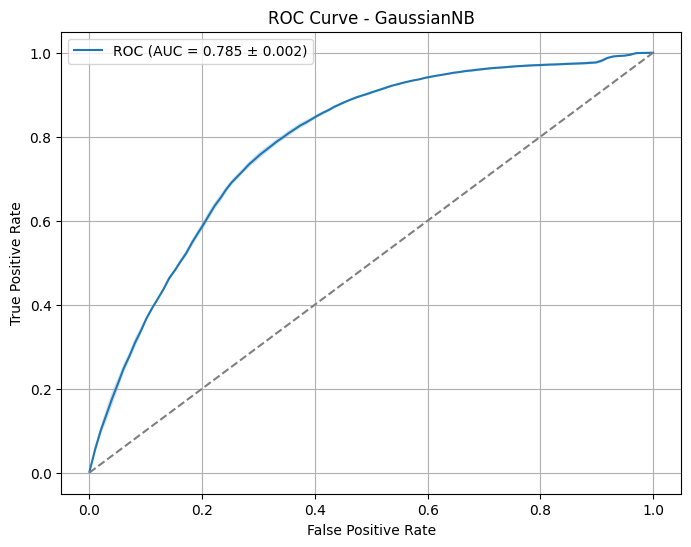

In [ ]:
# Definindo o modelo a ser testado
modelo = GaussianNB()

melhores_modelos['GaussianNB'] = modelo

resultados['GaussianNB'] = model_cross_val(modelo, X_train_array, y_train_array, show_confusion_matrix=True)


=== BernoulliNB ===
Acurácia média: 0.7331 ± 0.0040
F1 média:       0.7334 ± 0.0034
Precisão média: 0.7327 ± 0.0055
Recall médio:   0.7341 ± 0.0036
AUC média:      0.8055 ± 0.0035


<Figure size 600x500 with 0 Axes>

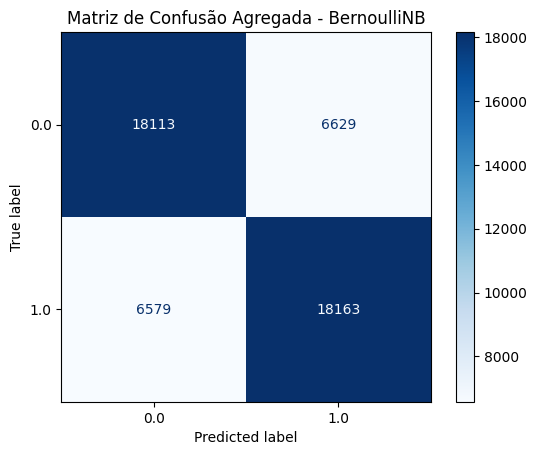

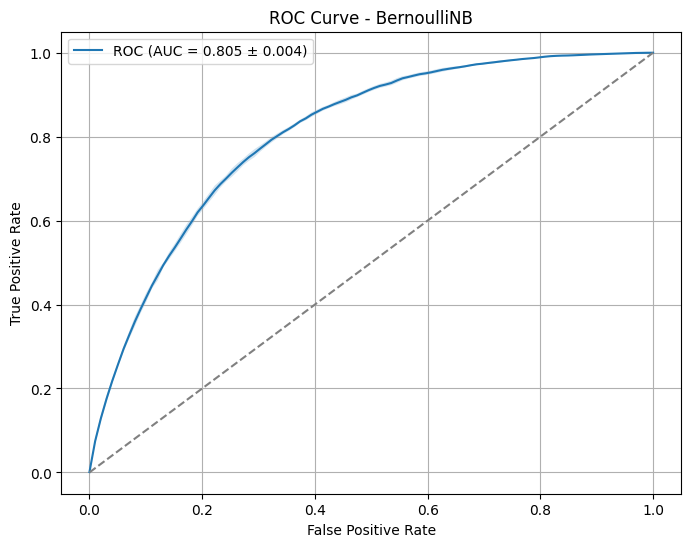

In [ ]:
modelo = BernoulliNB()

melhores_modelos['BernouliNB'] = modelo

resultados['BernouliNB'] = model_cross_val(modelo, X_train_array, y_train_array, show_confusion_matrix=True)

In [ ]:

"""melhor_modelo = grid_search_with_cv(
    modelo, 
    param_grid, 
    X_train_array, 
    y_train_array,
    cv=5
)"""



'melhor_modelo = grid_search_with_cv(\n    modelo, \n    param_grid, \n    X_train_array, \n    y_train_array,\n    cv=5\n)'

In [ ]:
df_resultados = pd.DataFrame(resultados).T
df_resultados = df_resultados.round(4)
print(df_resultados.sort_values('recall', ascending=False))

                        accuracy      f1  precision  recall     auc
Gradiente Boosting        0.7467  0.7576     0.7263  0.7918  0.8237
RandomForestClassifier    0.7442  0.7546     0.7253  0.7863  0.8204
SVM                       0.7431  0.7536     0.7239  0.7859  0.8204
LogisticRegression        0.7464  0.7524     0.7352  0.7705  0.8220
K-NN                      0.7179  0.7276     0.7034  0.7535  0.7819
BernouliNB                0.7331  0.7334     0.7327  0.7341  0.8055
GaussianNB                0.7228  0.7208     0.7261  0.7156  0.7854
Perceptron                0.6283  0.5951     0.6660  0.6759  0.7296
DecisionTreeClassifier    0.6097  0.4254     0.3931  0.4636  0.6097


### Voting Classifier

In [ ]:
#Isso ainda n fiz
"""estimadores = [('knn', melhores_modelos['RandomForestClassifier']), 
               ('nb', melhores_modelos['Naive Bayes']), 
               ('svm', melhores_modelos['SVM']), 
               ('Add', melhores_modelos['DecisionTreeClassifier']), 
               ('RF', melhores_modelos['RandomForestClassifier']),
               ('GB', melhores_modelos['Gradiente Boosting']) ]


for votingType in ['hard', 'soft']:
    eclf = VotingClassifier(
        estimators=estimadores,
        voting=votingType)
    
    eclf.fit(X_treino, y_treino)
    preds = eclf.predict(X_teste)
    acc = accuracy_score(y_teste, preds)*100
    prec = precision_score(y_teste, preds, average='macro')
    recal = recall_score(y_teste, preds, average='macro')
    f1 = f1_score(y_teste, preds,  average='macro')

    print(f"\nName: VotingClassifier {votingType}")
    print(f"Accuracy: {acc:.2f}")   
    print(f"Precision Score: {prec}")

    end.append({
        'Models': f"VotingClassifier {votingType}",
        'Acuracia do Teste': acc,
        'Precisao do Teste': prec,
        'Recall Score do Teste': recal,
        'F1 Score do Teste': f1
    })
    summary_df = pd.DataFrame(end)


print("\n 📊 Summary:")
summary_df """

KeyError: 'Naive Bayes'

## Avaliação Final

In [ ]:
# Para avaliação final no conjunto de teste
def avaliar_modelo_final(model, X_train, y_train, X_test, y_test):
    """
    Avaliação final no conjunto de teste (após escolher o melhor modelo)
    """
    # Normalizar usando TODO o conjunto de treino
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Treinar modelo final
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"\n=== Avaliação Final - {model.__class__.__name__} ===")
    print(f"Acurácia no teste: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 no teste:       {f1_score(y_test, y_pred):.4f}")
    print(f"Precisão no teste: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall no teste:   {recall_score(y_test, y_pred):.4f}")
    
    # OPÇÃO 3: Matriz de confusão no conjunto de teste final (MAIS IMPORTANTE)
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - Teste Final - {model.__class__.__name__}')
    plt.show()


Melhor modelo: Gradiente Boosting
Parâmetros: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.5, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

=== Avaliação Final - GradientBoostingClassifier ===
Acurácia no teste: 0.7514
F1 no teste:       0.7629
Precisão no teste: 0.7291
Recall no teste:   0.8000


<Figure size 800x600 with 0 Axes>

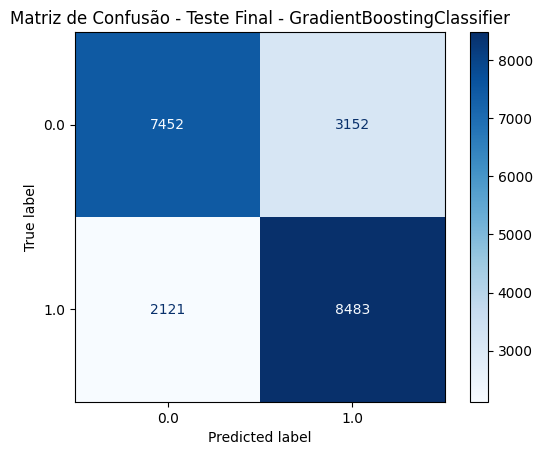

In [ ]:
# Escolher melhor modelo baseado no F1-score
melhor_modelo_nome = df_resultados['recall'].idxmax()
melhor_modelo = melhores_modelos[melhor_modelo_nome]

print(f"\nMelhor modelo: {melhor_modelo_nome}")
print(f"Parâmetros: {melhor_modelo.get_params()}")

# Avaliação final
resultado_final = avaliar_modelo_final(
    melhor_modelo, 
    X_train_array, 
    y_train_array, 
    X_test_array, 
    y_test_array
)